#**Introduction to Business analytics - Final Project. Classification**
##**A Case Study of Restaurant Customer Satisfaction**

## **Data Description**

This is a description of the dataset including the generated target variable 'HighSatisfaction':Binary variable indicating whether the customer is highly satisfied (1) or not (0).

This dataset provides comprehensive information on customer visits to restaurants, including demographic details, visit-specific metrics, and customer satisfaction ratings. It is designed to facilitate predictive modeling and analytics in the hospitality industry, focusing on factors that drive customer satisfaction.

**Features**

--Demographic Information

CustomerID: Unique identifier for each customer.\
Age: Age of the customer.\
Gender: Gender of the customer (Male/Female).\
Income: Annual income of the customer in USD.

--Visit-specific Variables

VisitFrequency: How often the customer visits the restaurant (Daily, Weekly, Monthly, Rarely).\
AverageSpend: Average amount spent by the customer per visit in USD.\
PreferredCuisine: The type of cuisine preferred by the customer (Italian, Chinese, Indian, Mexican, American).\
TimeOfVisit: The time of day the customer usually visits (Breakfast, Lunch, Dinner).\
GroupSize: Number of people in the customer's group during the visit.\
DiningOccasion: The occasion for dining (Casual, Business, Celebration).\
MealType: Type of meal (Dine-in, Takeaway).\
OnlineReservation: Whether the customer made an online reservation (0: No, 1: Yes).\
DeliveryOrder: Whether the customer ordered delivery (0: No, 1: Yes).\
LoyaltyProgramMember: Whether the customer is a member of the restaurant's loyalty program (0: No, 1: Yes).\
WaitTime: Average wait time for the customer in minutes.

--Satisfaction Ratings

ServiceRating: Customer's rating of the service (1 to 5).\
FoodRating: Customer's rating of the food (1 to 5).\
AmbianceRating: Customer's rating of the restaurant ambiance (1 to 5).

## **Data Loading**

In [ ]:
# import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

In [ ]:
import warnings
warnings.filterwarnings('ignore') # ignore the warning messages

In [ ]:
# read data
df = pd.read_csv('restaurant_customer_satisfaction.csv')

print(df.shape)

df.head() # the first 5 rows of the data

(1500, 19)


CustomerID  Age  Gender  Income VisitFrequency  AverageSpend  \
0         654   35    Male   83380         Weekly     27.829142   
1         655   19    Male   43623         Rarely    115.408622   
2         656   41  Female   83737         Weekly    106.693771   
3         657   43    Male   96768         Rarely     43.508508   
4         658   55  Female   67937        Monthly    148.084627   

  PreferredCuisine TimeOfVisit  GroupSize DiningOccasion  MealType  \
0          Chinese   Breakfast          3       Business  Takeaway   
1         American      Dinner          1         Casual   Dine-in   
2         American      Dinner          6    Celebration   Dine-in   
3           Indian       Lunch          1    Celebration   Dine-in   
4          Chinese   Breakfast          1       Business  Takeaway   

   OnlineReservation  DeliveryOrder  LoyaltyProgramMember   WaitTime  \
0                  0              1                     1  43.523929   
1                  0              0                     0  57.524294   
2                  0              1                     0  48.682623   
3                  0              0                     0   7.552993   
4                  0              0                     1  37.789041   

   ServiceRating  FoodRating  AmbianceRating  HighSatisfaction  
0              2           5               4                 0  
1              5           5               3                 0  
2              3           4               5                 0  
3              4           5               1                 0  
4              2           3               5                 0

## **Data Understanding**

### **Missing Values**

In [ ]:
# check missing values
df.isna().sum()

CustomerID              0
Age                     0
Gender                  0
Income                  0
VisitFrequency          0
AverageSpend            0
PreferredCuisine        0
TimeOfVisit             0
GroupSize               0
DiningOccasion          0
MealType                0
OnlineReservation       0
DeliveryOrder           0
LoyaltyProgramMember    0
WaitTime                0
ServiceRating           0
FoodRating              0
AmbianceRating          0
HighSatisfaction        0
dtype: int64

The data set doesn't have missing value.

### **Summary Statistics**

In [ ]:
# information about the column names and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerID            1500 non-null   int64  
 1   Age                   1500 non-null   int64  
 2   Gender                1500 non-null   object 
 3   Income                1500 non-null   int64  
 4   VisitFrequency        1500 non-null   object 
 5   AverageSpend          1500 non-null   float64
 6   PreferredCuisine      1500 non-null   object 
 7   TimeOfVisit           1500 non-null   object 
 8   GroupSize             1500 non-null   int64  
 9   DiningOccasion        1500 non-null   object 
 10  MealType              1500 non-null   object 
 11  OnlineReservation     1500 non-null   int64  
 12  DeliveryOrder         1500 non-null   int64  
 13  LoyaltyProgramMember  1500 non-null   int64  
 14  WaitTime              1500 non-null   float64
 15  ServiceRating        

In [ ]:
# summary statistics for numerical variables (mean, sd, min, max, quantiles)

#drop 'CustomerID'
df = df.drop(columns=['CustomerID'])
df.head()

df.describe()

Age         Income  AverageSpend    GroupSize  \
count  1500.000000    1500.000000   1500.000000  1500.000000   
mean     43.832000   85921.890000    105.659004     5.035333   
std      14.967157   38183.051749     52.381849     2.558864   
min      18.000000   20012.000000     10.306127     1.000000   
25%      31.750000   52444.000000     62.287907     3.000000   
50%      44.000000   85811.000000    104.626408     5.000000   
75%      57.000000  119159.250000    148.649330     7.000000   
max      69.000000  149875.000000    199.973527     9.000000   

       OnlineReservation  DeliveryOrder  LoyaltyProgramMember     WaitTime  \
count        1500.000000    1500.000000           1500.000000  1500.000000   
mean            0.296667       0.405333              0.480000    30.163550   
std             0.456941       0.491120              0.499766    17.214184   
min             0.000000       0.000000              0.000000     0.001380   
25%             0.000000       0.000000              0.000000    15.235423   
50%             0.000000       0.000000              0.000000    30.044055   
75%             1.000000       1.000000              1.000000    45.285649   
max             1.000000       1.000000              1.000000    59.970762   

       ServiceRating   FoodRating  AmbianceRating  HighSatisfaction  
count    1500.000000  1500.000000     1500.000000       1500.000000  
mean        3.044000     2.997333        2.987333          0.134000  
std         1.423405     1.418920        1.450716          0.340766  
min         1.000000     1.000000        1.000000          0.000000  
25%         2.000000     2.000000        2.000000          0.000000  
50%         3.000000     3.000000        3.000000          0.000000  
75%         4.000000     4.000000        4.000000          0.000000  
max         5.000000     5.000000        5.000000          1.000000

In [ ]:
# summary statistics for categorical variables
# Get count of each category in each column
gender_counts = df["Gender"].value_counts()
visit_frequency_counts = df["VisitFrequency"].value_counts()
preferred_cuisine_counts = df["PreferredCuisine"].value_counts()
time_of_visit_counts = df["TimeOfVisit"].value_counts()
dining_occasion_counts = df["DiningOccasion"].value_counts()
meal_type_counts = df["MealType"].value_counts()

# Print the counts for each categorical column
print(gender_counts)
print(visit_frequency_counts)
print(preferred_cuisine_counts)
print(time_of_visit_counts)
print(dining_occasion_counts)
print(meal_type_counts)


Gender
Female    759
Male      741
Name: count, dtype: int64
VisitFrequency
Weekly     606
Monthly    428
Rarely     313
Daily      153
Name: count, dtype: int64
PreferredCuisine
Italian     325
Chinese     310
Mexican     299
Indian      296
American    270
Name: count, dtype: int64
TimeOfVisit
Breakfast    506
Lunch        502
Dinner       492
Name: count, dtype: int64
DiningOccasion
Celebration    519
Business       500
Casual         481
Name: count, dtype: int64
MealType
Dine-in     751
Takeaway    749
Name: count, dtype: int64


In [ ]:
# summary statistics for discrete variables
# Compute frequencies (value counts) for each ordinal variable
group_size_counts = df["GroupSize"].value_counts().sort_index()
service_rating_counts = df["ServiceRating"].value_counts().sort_index()
food_rating_counts = df["FoodRating"].value_counts().sort_index()
ambiance_rating_counts = df["AmbianceRating"].value_counts().sort_index()

# Convert to DataFrame for easy viewing
group_size_counts_df = group_size_counts.to_frame(name="GroupSize Count")
service_rating_counts_df = service_rating_counts.to_frame(name="ServiceRating Count")
food_rating_counts_df = food_rating_counts.to_frame(name="FoodRating Count")
ambiance_rating_counts_df = ambiance_rating_counts.to_frame(name="AmbianceRating Count")

# Print the frequency counts
print(group_size_counts_df)
print(service_rating_counts_df)
print(food_rating_counts_df)
print(ambiance_rating_counts_df)

           GroupSize Count
GroupSize                 
1                      157
2                      165
3                      162
4                      183
5                      155
6                      165
7                      177
8                      180
9                      156
               ServiceRating Count
ServiceRating                     
1                              292
2                              289
3                              302
4                              295
5                              322
            FoodRating Count
FoodRating                  
1                        313
2                        274
3                        315
4                        300
5                        298
                AmbianceRating Count
AmbianceRating                      
1                                324
2                                298
3                                268
4                                293
5                                

In [ ]:
# the target variable
df['HighSatisfaction'].value_counts()

HighSatisfaction
0    1299
1     201
Name: count, dtype: int64

The target variable is imbalanced.

### **Visualization**

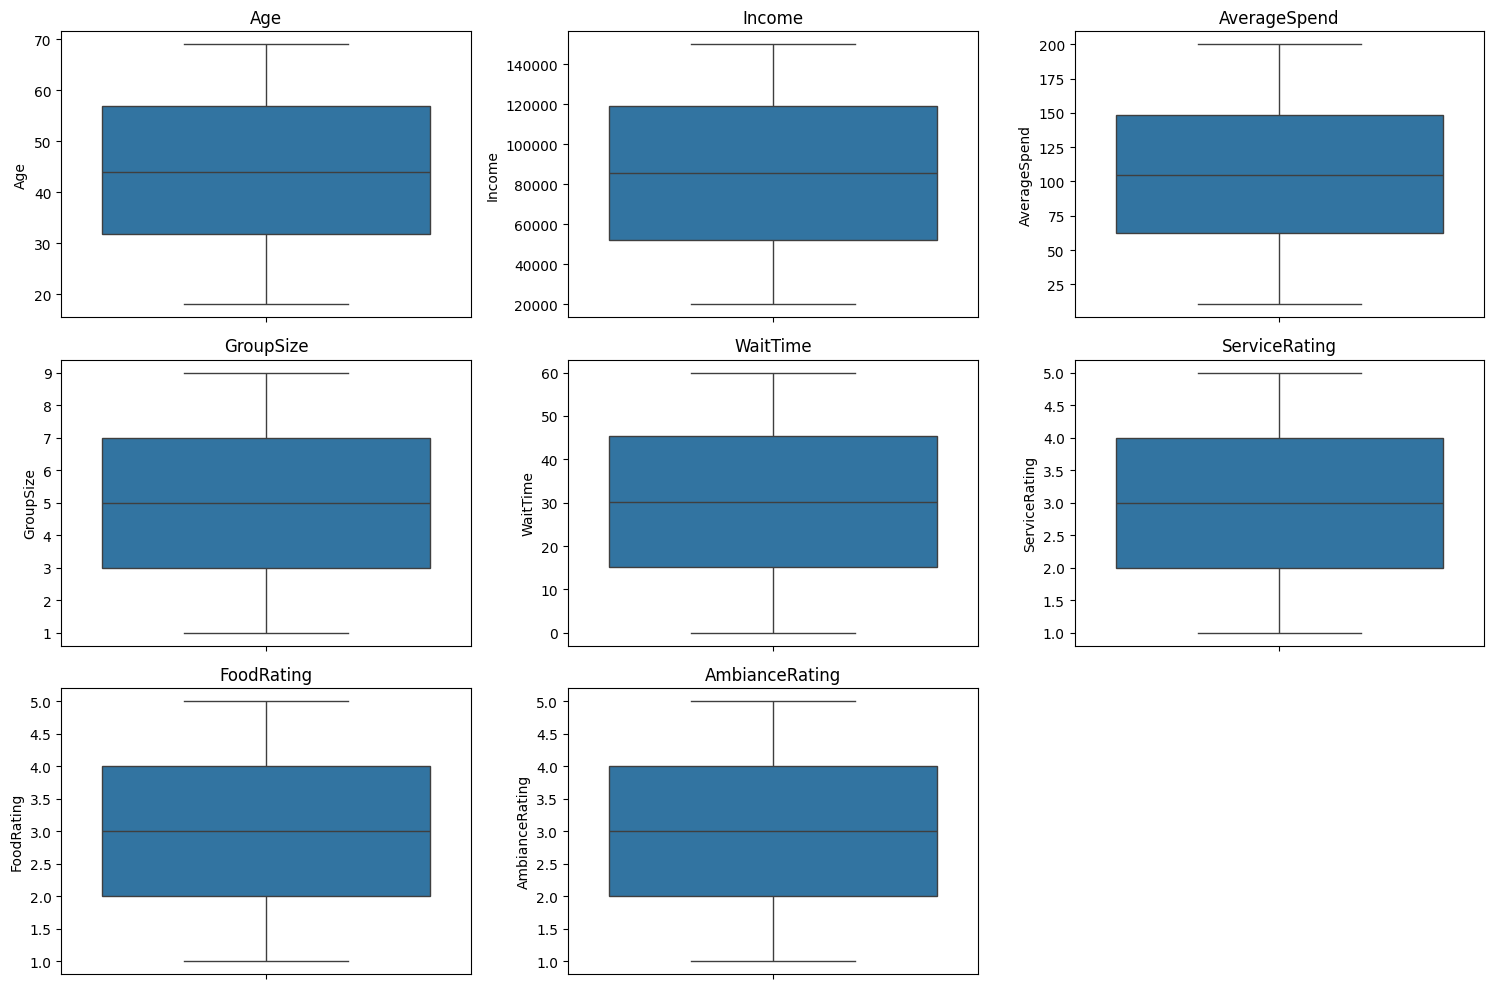

In [ ]:
# boxplot for all the numeric attributes to show the distribution
# define all the numeric_columns
numeric_columns = ['Age', 'Income', 'AverageSpend', 'GroupSize',
                   'WaitTime', 'ServiceRating', 'FoodRating', 'AmbianceRating']

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Create box plots for each numeric column
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, y=column)
    plt.title(column)

plt.tight_layout()
plt.show()

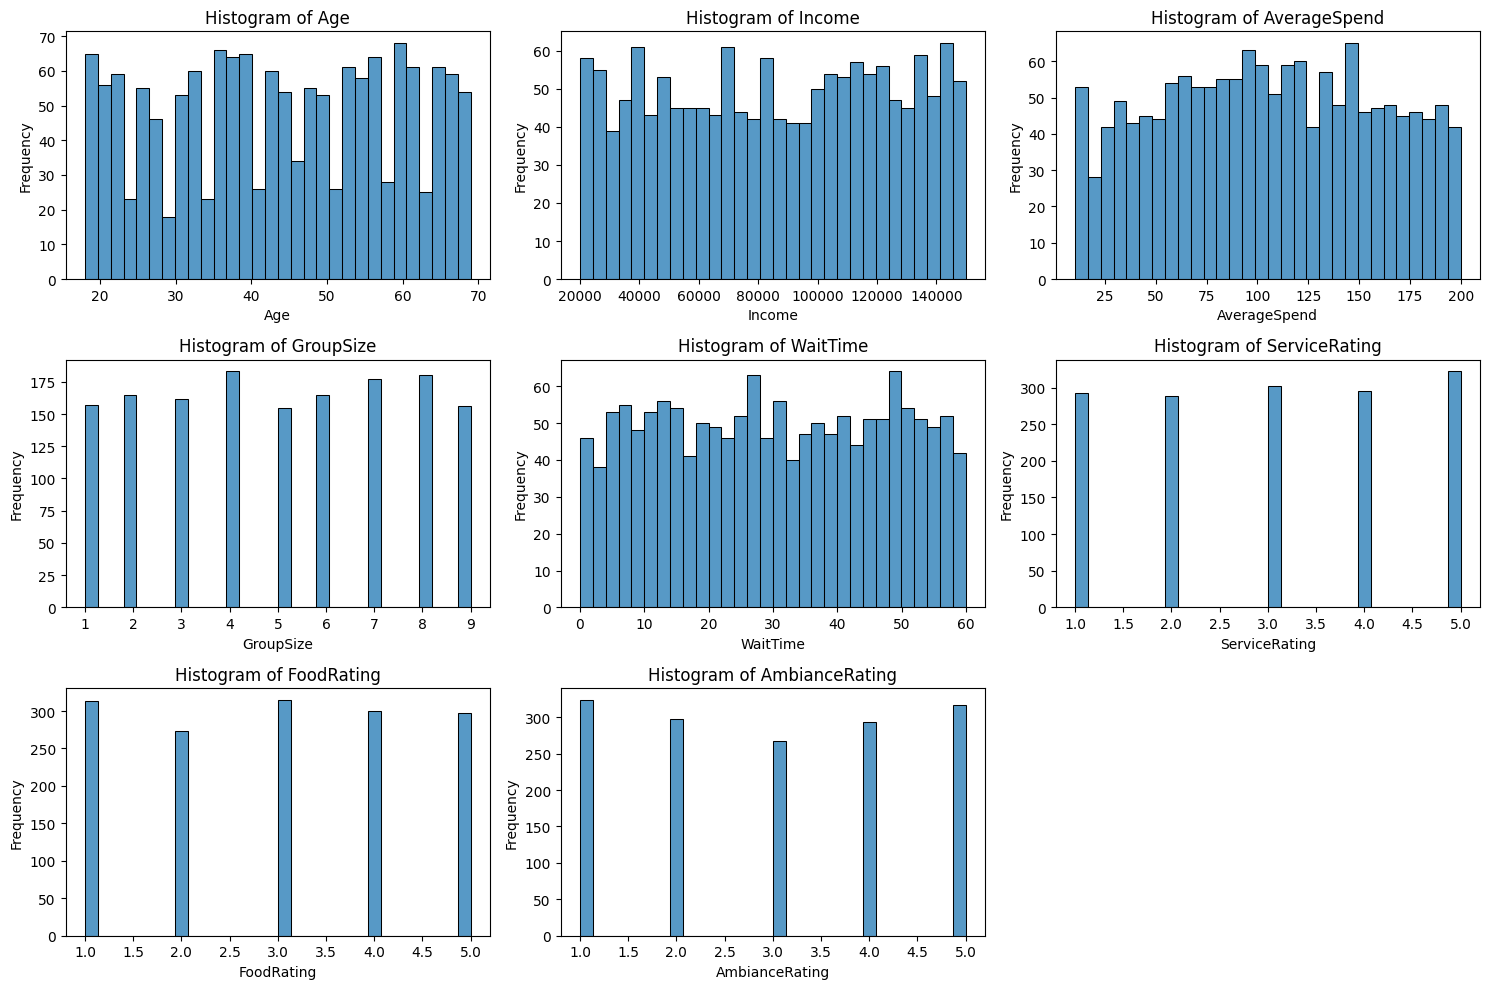

In [ ]:
# histogram for all the numeric attributes to show the distribution
plt.figure(figsize=(15, 10))

# Create histograms for each numeric column
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[column], bins=30, kde=False)  # Use kde=True for kernel density estimate
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

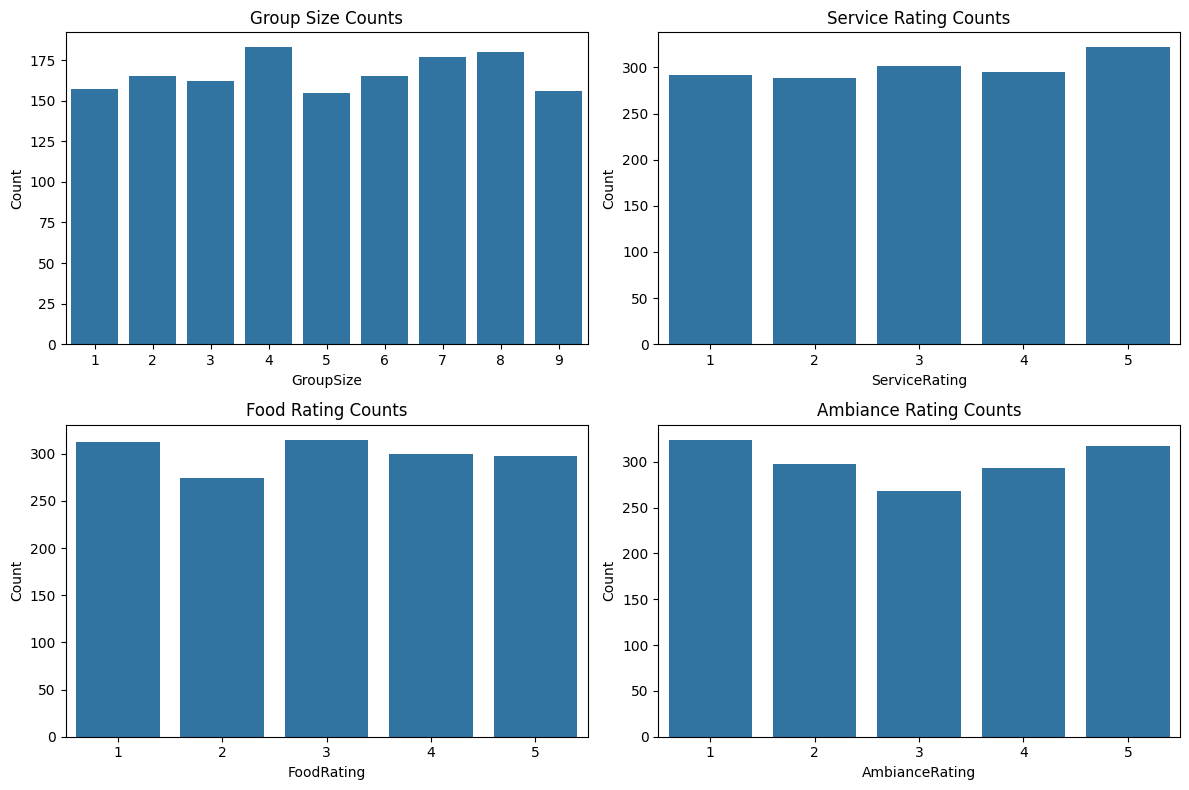

In [ ]:
# histogram for all the categorical attributes to show the distribution
# Create a function to plot counts for a given column
def plot_counts(columns, titles):
    num_columns = len(columns)
    rows = (num_columns + 1) // 2
    plt.figure(figsize=(12, rows * 4))

    for i, (column, title) in enumerate(zip(columns, titles), 1):
        plt.subplot(rows, 2, i)
        counts = df[column].value_counts().sort_index()
        sns.barplot(x=counts.index, y=counts.values)
        plt.title(title)
        plt.xlabel(column)
        plt.ylabel("Count")

    plt.tight_layout()
    plt.show()

# List of categorical columns and their titles
columns_to_plot = ["GroupSize", "ServiceRating", "FoodRating", "AmbianceRating"]
titles = ["Group Size Counts", "Service Rating Counts", "Food Rating Counts", "Ambiance Rating Counts"]

# Plot counts for each specified column
plot_counts(columns_to_plot, titles)

### **Correlation Matrix**

In [ ]:
# build the encoded dataframe
# One-hot encode the categorical columns
df_encoded = pd.get_dummies(df, columns=["Gender", "VisitFrequency", "PreferredCuisine", "TimeOfVisit", "DiningOccasion", "MealType"])
df_encoded = df_encoded.astype(int)

# View the new columns
df_encoded.head()

Age  Income  AverageSpend  GroupSize  OnlineReservation  DeliveryOrder  \
0   35   83380            27          3                  0              1   
1   19   43623           115          1                  0              0   
2   41   83737           106          6                  0              1   
3   43   96768            43          1                  0              0   
4   55   67937           148          1                  0              0   

   LoyaltyProgramMember  WaitTime  ServiceRating  FoodRating  ...  \
0                     1        43              2           5  ...   
1                     0        57              5           5  ...   
2                     0        48              3           4  ...   
3                     0         7              4           5  ...   
4                     1        37              2           3  ...   

   PreferredCuisine_Italian  PreferredCuisine_Mexican  TimeOfVisit_Breakfast  \
0                         0                         0                      1   
1                         0                         0                      0   
2                         0                         0                      0   
3                         0                         0                      0   
4                         0                         0                      1   

   TimeOfVisit_Dinner  TimeOfVisit_Lunch  DiningOccasion_Business  \
0                   0                  0                        1   
1                   1                  0                        0   
2                   1                  0                        0   
3                   0                  1                        0   
4                   0                  0                        1   

   DiningOccasion_Casual  DiningOccasion_Celebration  MealType_Dine-in  \
0                      0                           0                 0   
1                      1                           0                 1   
2                      0                           1                 1   
3                      0                           1                 1   
4                      0                           0                 0   

   MealType_Takeaway  
0                  1  
1                  0  
2                  0  
3                  0  
4                  1  

[5 rows x 31 columns]

In [ ]:
# Compute the correlation matrix
corr_matrix = df_encoded.corr()

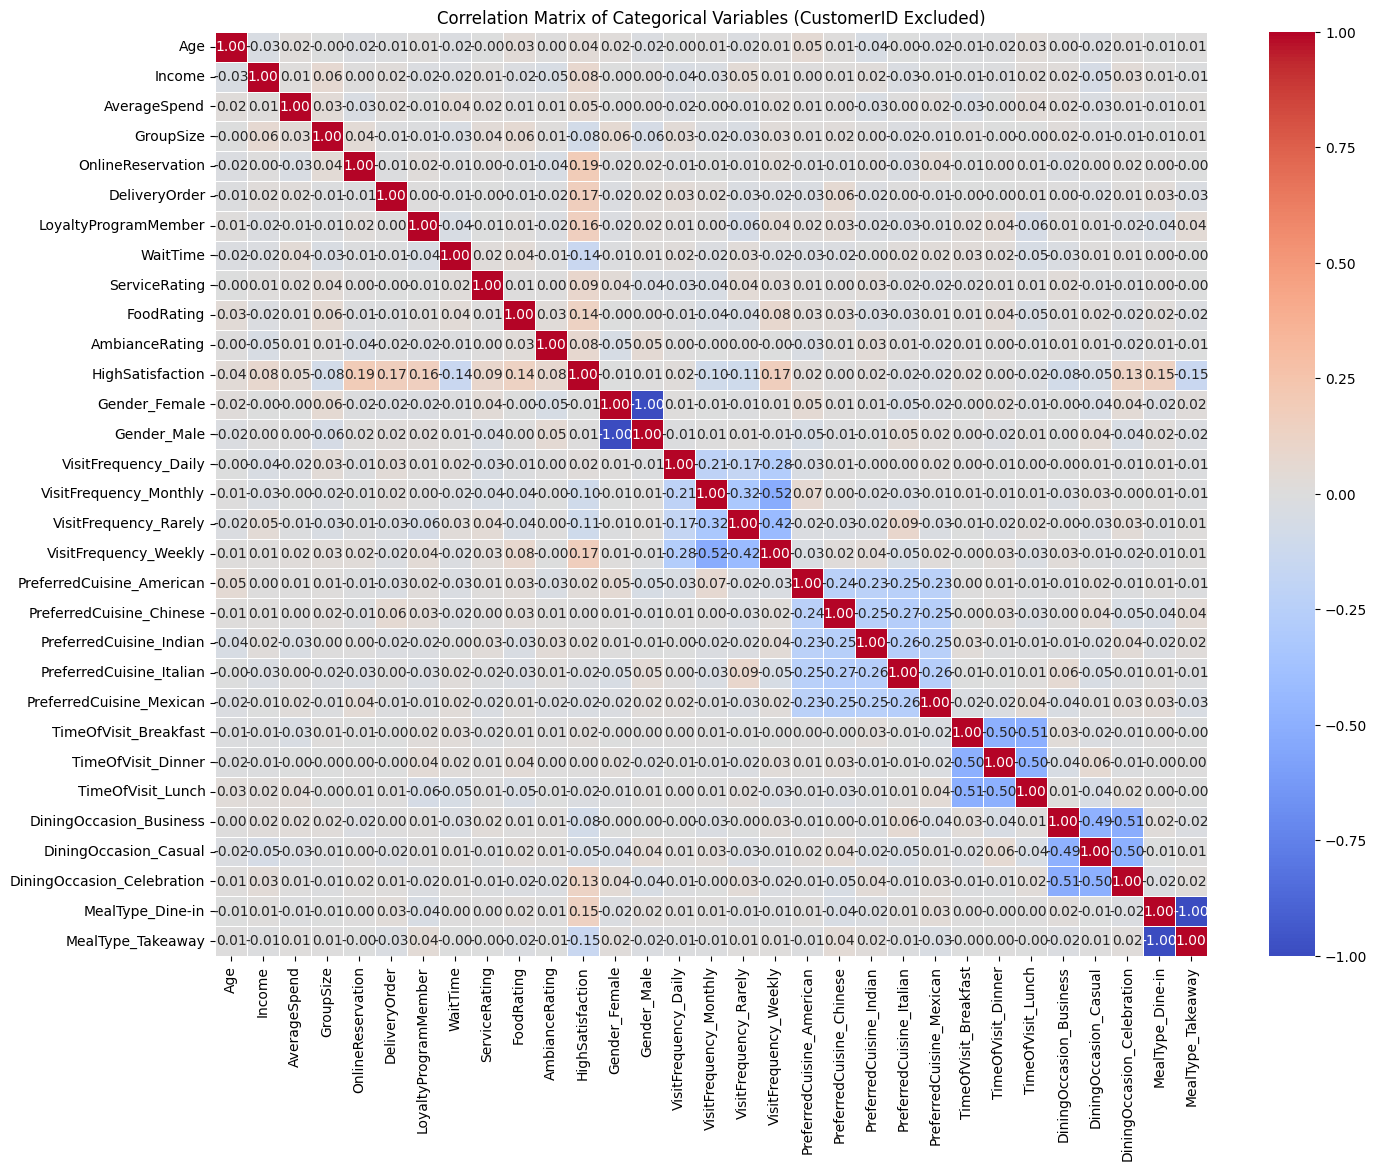

In [ ]:
# show the correlation heatmap of encoded dataframe
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5, annot_kws={"size": 10})
plt.title("Correlation Matrix of Categorical Variables (CustomerID Excluded)")
plt.show()

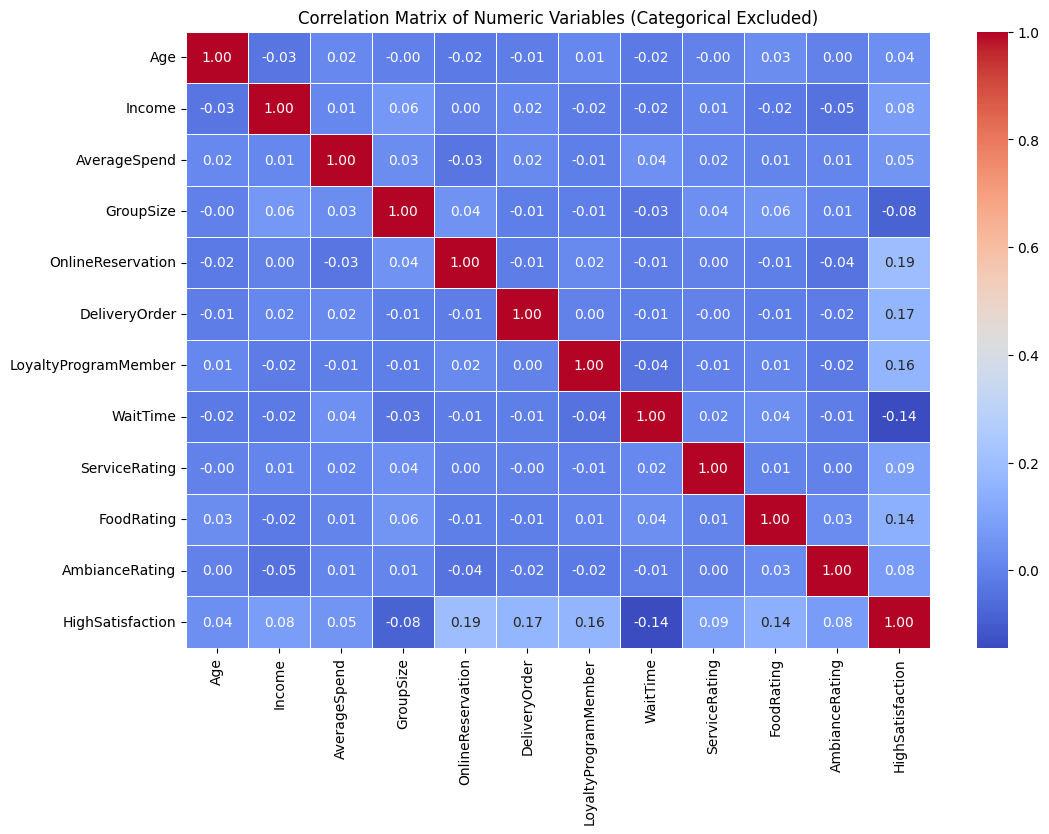

In [ ]:
# correlation heatmap of numerical variables
# List of categorical columns to exclude
categorical_columns = [
    "Gender", "VisitFrequency",
    "PreferredCuisine", "TimeOfVisit",
    "DiningOccasion", "MealType"
]

# Create a new DataFrame with only numeric columns
df_numeric = df.drop(columns=categorical_columns)

corr_matrix = df_numeric.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5, annot_kws={"size": 10})
plt.title("Correlation Matrix of Numeric Variables (Categorical Excluded)")
plt.show()

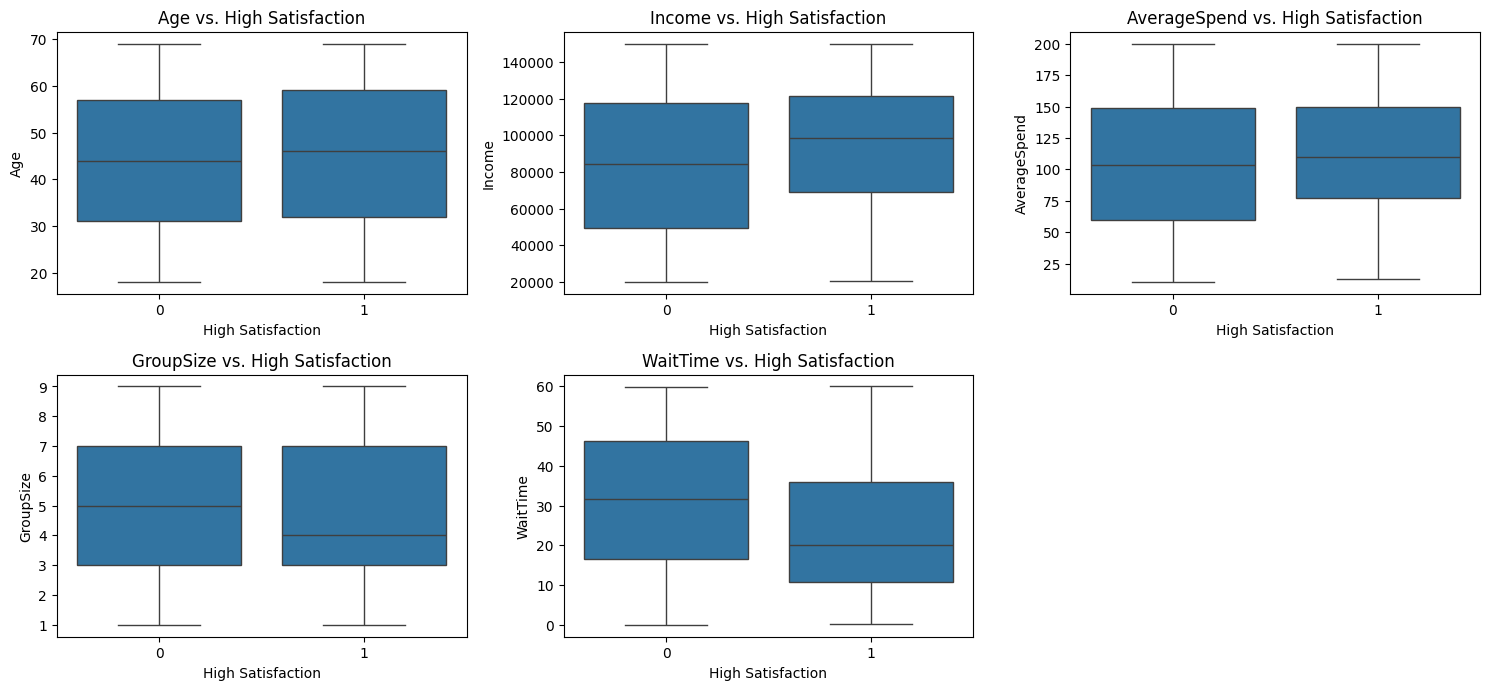

In [ ]:
# boxplot of numeric columns and the target variable
# List of numeric columns to plot against 'HighSatisfaction'
numeric_columns = ['Age', 'Income', 'AverageSpend', 'GroupSize',
                   'WaitTime'] # not including ratings as identified as data leakage

plt.figure(figsize=(15, 10))

# Create box plots for each numeric column against 'HighSatisfaction'
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='HighSatisfaction', y=column, data=df)
    plt.title(f'{column} vs. High Satisfaction')
    plt.xlabel('High Satisfaction')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

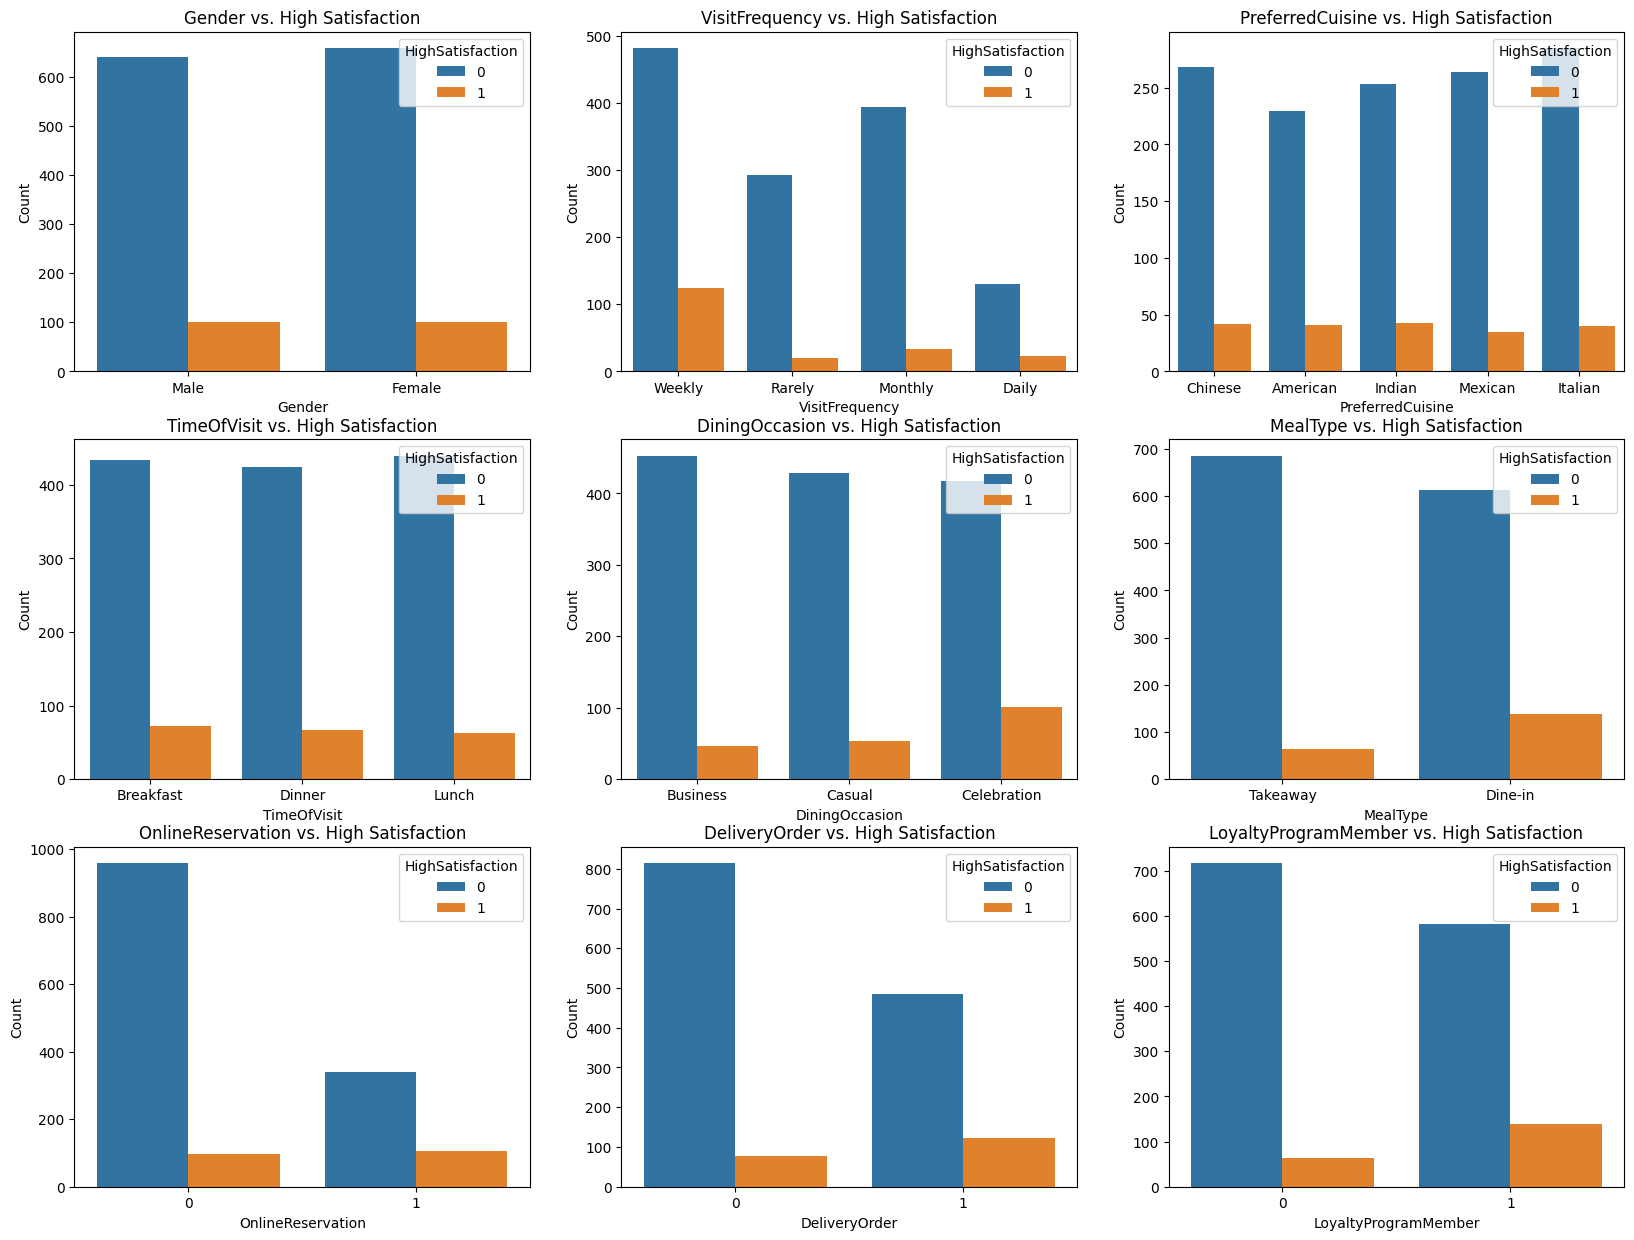

In [ ]:
# histogram of categorical columns and the target variable
# List of categorical columns to plot against 'HighSatisfaction'
categorical_columns = ['Gender', 'VisitFrequency', 'PreferredCuisine',
                       'TimeOfVisit', 'DiningOccasion', 'MealType',
                       'OnlineReservation', 'DeliveryOrder', 'LoyaltyProgramMember']
plt.figure(figsize=(20, 15))

# Create count plots for each categorical column against 'HighSatisfaction'
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=column, hue='HighSatisfaction', data=df)
    plt.title(f'{column} vs. High Satisfaction')
    plt.xlabel(column)
    plt.ylabel('Count')


## **Data Preparation**

### **Exclude Variables**

In [ ]:
#drop the variables 'CustomerID'
df.drop(columns=['ServiceRating', 'FoodRating', 'AmbianceRating'], inplace=True)
df.head()

Age  Gender  Income VisitFrequency  AverageSpend PreferredCuisine  \
0   35    Male   83380         Weekly     27.829142          Chinese   
1   19    Male   43623         Rarely    115.408622         American   
2   41  Female   83737         Weekly    106.693771         American   
3   43    Male   96768         Rarely     43.508508           Indian   
4   55  Female   67937        Monthly    148.084627          Chinese   

  TimeOfVisit  GroupSize DiningOccasion  MealType  OnlineReservation  \
0   Breakfast          3       Business  Takeaway                  0   
1      Dinner          1         Casual   Dine-in                  0   
2      Dinner          6    Celebration   Dine-in                  0   
3       Lunch          1    Celebration   Dine-in                  0   
4   Breakfast          1       Business  Takeaway                  0   

   DeliveryOrder  LoyaltyProgramMember   WaitTime  HighSatisfaction  
0              1                     1  43.523929                 0  
1              0                     0  57.524294                 0  
2              1                     0  48.682623                 0  
3              0                     0   7.552993                 0  
4              0                     1  37.789041                 0

In [ ]:
df

Age  Gender  Income VisitFrequency  AverageSpend PreferredCuisine  \
0      35    Male   83380         Weekly     27.829142          Chinese   
1      19    Male   43623         Rarely    115.408622         American   
2      41  Female   83737         Weekly    106.693771         American   
3      43    Male   96768         Rarely     43.508508           Indian   
4      55  Female   67937        Monthly    148.084627          Chinese   
...   ...     ...     ...            ...           ...              ...   
1495   39    Male  114857        Monthly    163.015254         American   
1496   37  Female  133506         Weekly    190.991911          Italian   
1497   46    Male  119159        Monthly    150.088604         American   
1498   24    Male   27970         Weekly    196.363626          Italian   
1499   51    Male  148333         Weekly    171.119498          Chinese   

     TimeOfVisit  GroupSize DiningOccasion  MealType  OnlineReservation  \
0      Breakfast          3       Business  Takeaway                  0   
1         Dinner          1         Casual   Dine-in                  0   
2         Dinner          6    Celebration   Dine-in                  0   
3          Lunch          1    Celebration   Dine-in                  0   
4      Breakfast          1       Business  Takeaway                  0   
...          ...        ...            ...       ...                ...   
1495       Lunch          2       Business   Dine-in                  0   
1496       Lunch          4         Casual  Takeaway                  0   
1497       Lunch          4         Casual   Dine-in                  0   
1498      Dinner          6         Casual   Dine-in                  1   
1499   Breakfast          4         Casual   Dine-in                  1   

      DeliveryOrder  LoyaltyProgramMember   WaitTime  HighSatisfaction  
0                 1                     1  43.523929                 0  
1                 0                     0  57.524294                 0  
2                 1                     0  48.682623                 0  
3                 0                     0   7.552993                 0  
4                 0                     1  37.789041                 0  
...             ...                   ...        ...               ...  
1495              1                     1   7.206275                 0  
1496              0                     0  37.863952                 0  
1497              1                     0   3.925785                 1  
1498              1                     0  24.228038                 1  
1499              1                     1  39.402163                 1  

[1500 rows x 15 columns]



```
# This is formatted as code
```

### **Feature Engineering**

In [ ]:
# average_spend per person = AverageSpend/GroupSize
df['avgSpend'] = df['AverageSpend']/df['GroupSize']

In [ ]:
# annual_spend per person = average_spend * frequency
frequency_mapping = { # number of visits per year
    "Daily": 365,
    "Weekly": 52,
    "Monthly": 12,
    "Rarely": 2 # adjustable
}
df['VisitsPerYear'] = df['VisitFrequency'].map(frequency_mapping)
df['avgSpend'] = pd.to_numeric(df['avgSpend'], errors='coerce')
df['VisitsPerYear'] = pd.to_numeric(df['VisitsPerYear'], errors='coerce')  # Convert VisitsPerYear to numeric

df['AnnualSpend_per_person'] = df['avgSpend'] * df['VisitsPerYear']
df.drop(columns=['VisitsPerYear'], inplace=True)
df.head(5)


Age  Gender  Income VisitFrequency  AverageSpend PreferredCuisine  \
0   35    Male   83380         Weekly     27.829142          Chinese   
1   19    Male   43623         Rarely    115.408622         American   
2   41  Female   83737         Weekly    106.693771         American   
3   43    Male   96768         Rarely     43.508508           Indian   
4   55  Female   67937        Monthly    148.084627          Chinese   

  TimeOfVisit  GroupSize DiningOccasion  MealType  OnlineReservation  \
0   Breakfast          3       Business  Takeaway                  0   
1      Dinner          1         Casual   Dine-in                  0   
2      Dinner          6    Celebration   Dine-in                  0   
3       Lunch          1    Celebration   Dine-in                  0   
4   Breakfast          1       Business  Takeaway                  0   

   DeliveryOrder  LoyaltyProgramMember   WaitTime  HighSatisfaction  \
0              1                     1  43.523929                 0   
1              0                     0  57.524294                 0   
2              1                     0  48.682623                 0   
3              0                     0   7.552993                 0   
4              0                     1  37.789041                 0   

     avgSpend  AnnualSpend_per_person  
0    9.276381              482.371795  
1  115.408622              230.817245  
2   17.782295              924.679350  
3   43.508508               87.017015  
4  148.084627             1777.015526

In [ ]:
# annual_spending_rate = annualspend_per_person/income
df['annual_spending_rate'] = df['AnnualSpend_per_person']/df['Income']
df.head(5)

Age  Gender  Income VisitFrequency  AverageSpend PreferredCuisine  \
0   35    Male   83380         Weekly     27.829142          Chinese   
1   19    Male   43623         Rarely    115.408622         American   
2   41  Female   83737         Weekly    106.693771         American   
3   43    Male   96768         Rarely     43.508508           Indian   
4   55  Female   67937        Monthly    148.084627          Chinese   

  TimeOfVisit  GroupSize DiningOccasion  MealType  OnlineReservation  \
0   Breakfast          3       Business  Takeaway                  0   
1      Dinner          1         Casual   Dine-in                  0   
2      Dinner          6    Celebration   Dine-in                  0   
3       Lunch          1    Celebration   Dine-in                  0   
4   Breakfast          1       Business  Takeaway                  0   

   DeliveryOrder  LoyaltyProgramMember   WaitTime  HighSatisfaction  \
0              1                     1  43.523929                 0   
1              0                     0  57.524294                 0   
2              1                     0  48.682623                 0   
3              0                     0   7.552993                 0   
4              0                     1  37.789041                 0   

     avgSpend  AnnualSpend_per_person  annual_spending_rate  
0    9.276381              482.371795              0.005785  
1  115.408622              230.817245              0.005291  
2   17.782295              924.679350              0.011043  
3   43.508508               87.017015              0.000899  
4  148.084627             1777.015526              0.026157

### **Redo EDA with new features**

In [ ]:
# statistical summary of new table
df.describe()

Age         Income  AverageSpend    GroupSize  \
count  1500.000000    1500.000000   1500.000000  1500.000000   
mean     43.832000   85921.890000    105.659004     5.035333   
std      14.967157   38183.051749     52.381849     2.558864   
min      18.000000   20012.000000     10.306127     1.000000   
25%      31.750000   52444.000000     62.287907     3.000000   
50%      44.000000   85811.000000    104.626408     5.000000   
75%      57.000000  119159.250000    148.649330     7.000000   
max      69.000000  149875.000000    199.973527     9.000000   

       OnlineReservation  DeliveryOrder  LoyaltyProgramMember     WaitTime  \
count        1500.000000    1500.000000           1500.000000  1500.000000   
mean            0.296667       0.405333              0.480000    30.163550   
std             0.456941       0.491120              0.499766    17.214184   
min             0.000000       0.000000              0.000000     0.001380   
25%             0.000000       0.000000              0.000000    15.235423   
50%             0.000000       0.000000              0.000000    30.044055   
75%             1.000000       1.000000              1.000000    45.285649   
max             1.000000       1.000000              1.000000    59.970762   

       HighSatisfaction     avgSpend  AnnualSpend_per_person  \
count       1500.000000  1500.000000             1500.000000   
mean           0.134000    32.149795             1925.603049   
std            0.340766    34.342152             5258.401619   
min            0.000000     1.222755                3.254181   
25%            0.000000    11.934605              130.991088   
50%            0.000000    21.001584              489.856139   
75%            0.000000    37.763247             1490.075840   
max            1.000000   199.924215            68046.034608   

       annual_spending_rate  
count           1500.000000  
mean               0.032567  
std                0.119194  
min                0.000024  
25%                0.001609  
50%                0.006494  
75%                0.021422  
max                1.956464

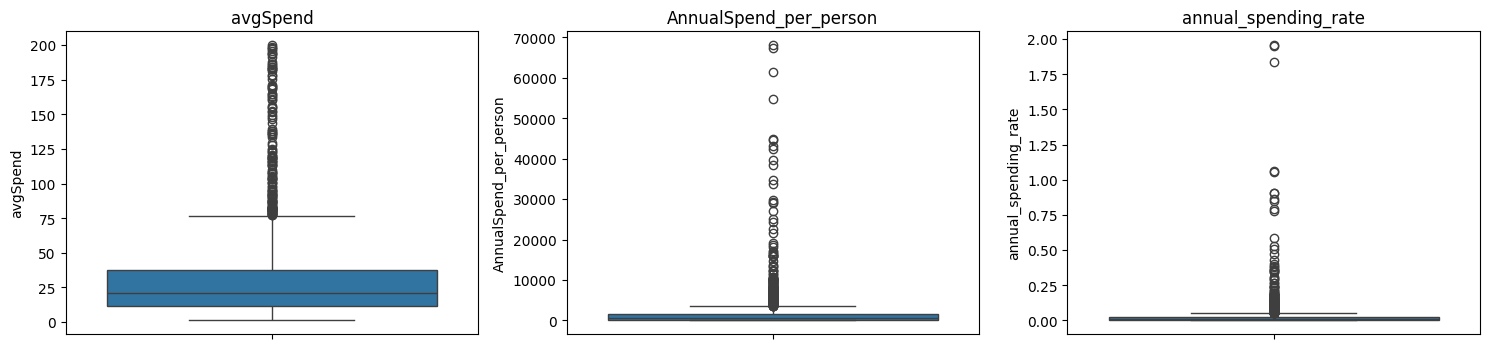

In [ ]:
# visualization of the new features
# boxplot for the three new numeric attritubes
new_columns = ['avgSpend', 'AnnualSpend_per_person', 'annual_spending_rate']

plt.figure(figsize=(15, 10))

# Create box plots for each numeric column
for i, column in enumerate(new_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, y=column)
    plt.title(column)

plt.tight_layout()
plt.show()

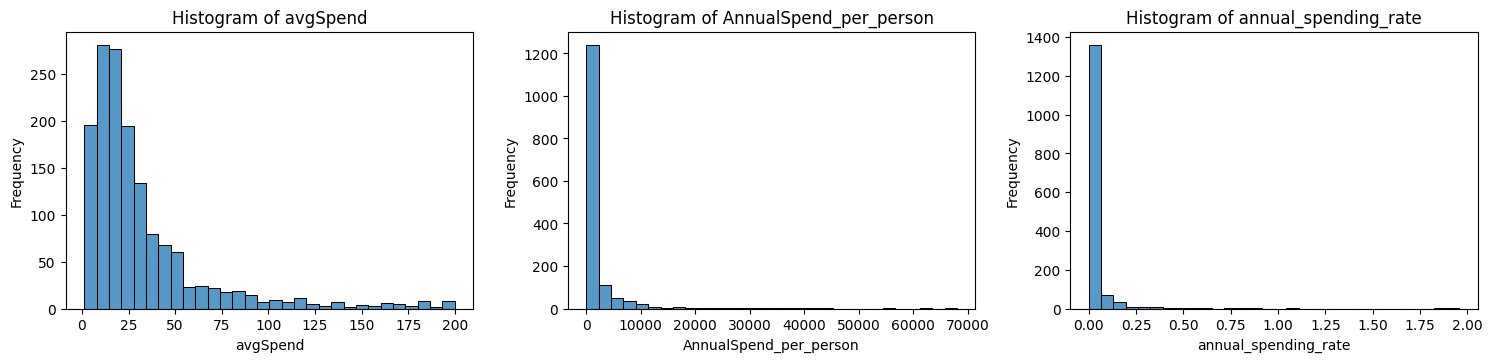

In [ ]:
# histogram for the three new numeric attritubes
plt.figure(figsize=(15, 10))

# Create histograms for each numeric column
for i, column in enumerate(new_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[column], bins=30, kde=False)  # Use kde=True for kernel density estimate
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

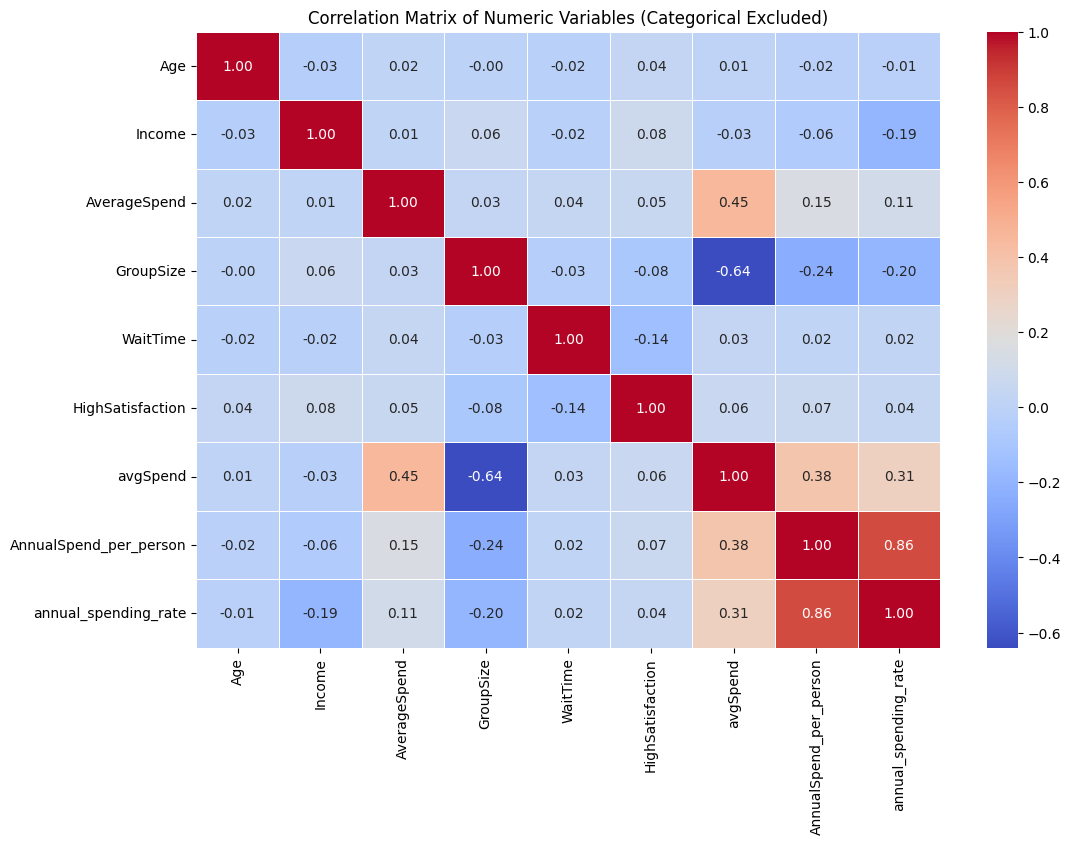

In [ ]:
# correlation heatmap with only numeric columns (combining the new features)
# Create a new DataFrame with only numeric columns
df_numeric = df.drop(columns=categorical_columns)

corr_matrix = df_numeric.corr()

plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5, annot_kws={"size": 10})
plt.title("Correlation Matrix of Numeric Variables (Categorical Excluded)")
plt.show()

annual_spending_rate is highly correlated with AnnualSpending_per_person.

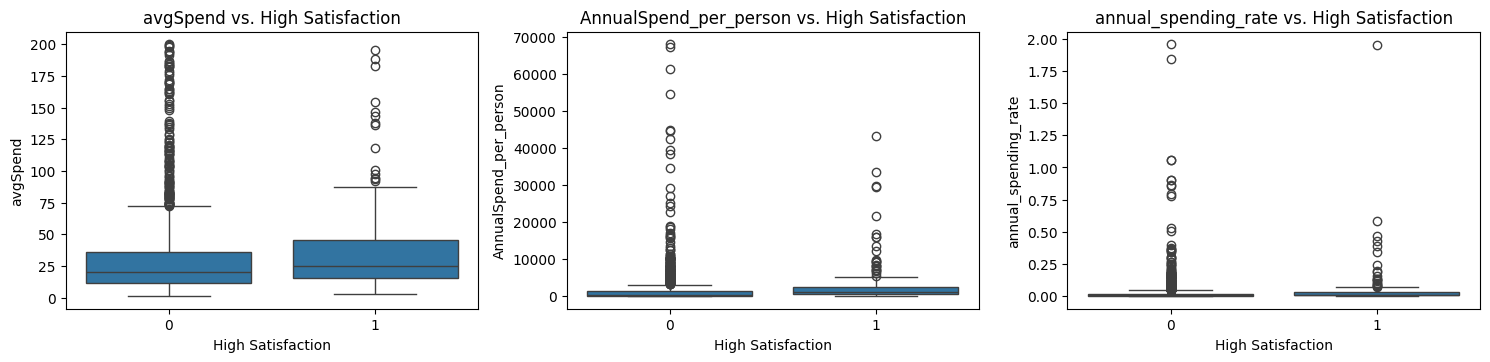

In [ ]:
# boxplot of new columns and target variable
plt.figure(figsize=(15, 10))

# Create box plots for each numeric column against 'HighSatisfaction'
for i, column in enumerate(new_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='HighSatisfaction', y=column, data=df)
    plt.title(f'{column} vs. High Satisfaction')
    plt.xlabel('High Satisfaction')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

### **Split Dataset into Train&Test Sets**

In [ ]:
# One-hot encode the categorical columns
df_encoded = pd.get_dummies(df, columns=["Gender", "VisitFrequency", "PreferredCuisine", "TimeOfVisit", "DiningOccasion", "MealType"])
df_encoded = df_encoded.astype(int)

from sklearn.model_selection import train_test_split

# declare X and Y variables
y = df_encoded["HighSatisfaction"]
X = df_encoded.drop("HighSatisfaction",axis = 1)

print(X.shape)

# split dataset into train&test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

(1500, 30)


In [ ]:
X

Age  Income  AverageSpend  GroupSize  OnlineReservation  DeliveryOrder  \
0      35   83380            27          3                  0              1   
1      19   43623           115          1                  0              0   
2      41   83737           106          6                  0              1   
3      43   96768            43          1                  0              0   
4      55   67937           148          1                  0              0   
...   ...     ...           ...        ...                ...            ...   
1495   39  114857           163          2                  0              1   
1496   37  133506           190          4                  0              0   
1497   46  119159           150          4                  0              1   
1498   24   27970           196          6                  1              1   
1499   51  148333           171          4                  1              1   

      LoyaltyProgramMember  WaitTime  avgSpend  AnnualSpend_per_person  ...  \
0                        1        43         9                     482  ...   
1                        0        57       115                     230  ...   
2                        0        48        17                     924  ...   
3                        0         7        43                      87  ...   
4                        1        37       148                    1777  ...   
...                    ...       ...       ...                     ...  ...   
1495                     1         7        81                     978  ...   
1496                     0        37        47                    2482  ...   
1497                     0         3        37                     450  ...   
1498                     0        24        32                    1701  ...   
1499                     1        39        42                    2224  ...   

      PreferredCuisine_Italian  PreferredCuisine_Mexican  \
0                            0                         0   
1                            0                         0   
2                            0                         0   
3                            0                         0   
4                            0                         0   
...                        ...                       ...   
1495                         0                         0   
1496                         1                         0   
1497                         0                         0   
1498                         1                         0   
1499                         0                         0   

      TimeOfVisit_Breakfast  TimeOfVisit_Dinner  TimeOfVisit_Lunch  \
0                         1                   0                  0   
1                         0                   1                  0   
2                         0                   1                  0   
3                         0                   0                  1   
4                         1                   0                  0   
...                     ...                 ...                ...   
1495                      0                   0                  1   
1496                      0                   0                  1   
1497                      0                   0                  1   
1498                      0                   1                  0   
1499                      1                   0                  0   

      DiningOccasion_Business  DiningOccasion_Casual  \
0                           1                      0   
1                           0                      1   
2                           0                      0   
3                           0                      0   
4                           1                      0   
...                       ...                    ...   
1495                        1                      0   
1496                        0                      1   
1497                        0 

### **Dataset Balancing**

Note: I randomly sampled minority instances and repeated until the dataset contains equal number of each class. I perform oversampling in the train set.

In [ ]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

In [ ]:
# perform oversampling in the train set

print('Original dataset shape %s' % Counter(y))
print('Train dataset shape %s' % Counter(y_train))
print('Test dataset shape %s' % Counter(y_test))

ros = RandomOverSampler(random_state=42) # default sampling strategy: resample all classes but the majority class
X_oversampled_train, y_oversampled_train = ros.fit_resample(X_train, y_train)

print('Resampled train dataset shape %s' % Counter(y_oversampled_train))

Original dataset shape Counter({0: 1299, 1: 201})
Train dataset shape Counter({0: 1040, 1: 160})
Test dataset shape Counter({0: 259, 1: 41})
Resampled train dataset shape Counter({0: 1040, 1: 1040})


## **Modeling - Logistic Regression**

In [ ]:
# import packages
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import numpy as np
import os

#To ignore the convergence warnings
from  warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore")

import math

### **Logistic Regression**

In [ ]:
# Cross Validation
inner_cv = KFold(n_splits = 5, shuffle = True)
outer_cv = KFold(n_splits = 5, shuffle = True)

In [ ]:
# Grid Search for choosing C parameter AND feature selection
gs_lr = GridSearchCV(estimator=LogisticRegression(random_state = 42, solver = 'liblinear', multi_class = 'ovr', penalty = 'l1'),
                  param_grid=[{'tol' : [.00001, .0001, .001, .01, .1],
                              'fit_intercept' : [True, False]}],
                  scoring='f1',
                  cv = inner_cv,
                  n_jobs = 4)

In [ ]:
#Fit LR - Key as ordinal variable
lr = gs_lr.fit(X_oversampled_train,y_oversampled_train)  #np.ravel()
print("\n Parameter Tuning")
print("Non-nested CV F-1 Score: ", gs_lr.best_score_)
print("Optimal Parameter: ", gs_lr.best_params_)
print("Optimal Estimator: ", gs_lr.best_estimator_)


 Parameter Tuning
Non-nested CV F-1 Score:  0.7718961180281629
Optimal Parameter:  {'fit_intercept': False, 'tol': 1e-05}
Optimal Estimator:  LogisticRegression(fit_intercept=False, multi_class='ovr', penalty='l1',
                   random_state=42, solver='liblinear', tol=1e-05)


In [ ]:
nested_score_lr = cross_val_score(gs_lr, X=X_oversampled_train, y=y_oversampled_train, cv=outer_cv, scoring = 'f1')
print("Nested CV F-1 Score:",nested_score_lr.mean(), " +/- ", nested_score_lr.std())

Nested CV F-1 Score: 0.7696299523471313  +/-  0.03177155024338283


### **Important Features**

In [ ]:
# define LR with optimal parameters
lr =  gs_lr.best_estimator_
lr.fit(X_oversampled_train, y_oversampled_train)

LogisticRegression(fit_intercept=False, multi_class='ovr', penalty='l1',
                   random_state=42, solver='liblinear', tol=1e-05)

In [ ]:
# get coefficient
lrintercept = lr.intercept_
lrcoefficients = lr.coef_[0]
print(lrintercept)
print(lrcoefficients)

0.0
[ 1.26e-02  7.26e-06  5.38e-03 -2.24e-01  1.46e+00  1.11e+00  7.23e-01
 -2.94e-02 -7.50e-03  2.06e-05  0.00e+00 -1.50e-01 -1.21e-01 -3.32e-01
 -6.93e-01 -1.12e+00  4.81e-01  0.00e+00 -5.10e-02  2.05e-01 -4.10e-02
 -2.45e-01  0.00e+00 -1.03e-01 -2.10e-01 -7.53e-01 -5.14e-01  0.00e+00
 -3.83e-02 -1.01e+00]


In [ ]:
# match odds to column name
feature_importance = pd.DataFrame(X.columns, columns = ["feature"])
feature_importance["odds"] = pow(math.e, lrcoefficients)  # e raised to the power x
feature_importance = feature_importance.sort_values(by = ["odds"], ascending=False)
feature_importance

feature      odds
4            OnlineReservation  4.299793
5                DeliveryOrder  3.020490
6         LoyaltyProgramMember  2.061109
16       VisitFrequency_Weekly  1.618220
19     PreferredCuisine_Indian  1.227148
0                          Age  1.012677
2                 AverageSpend  1.005390
9       AnnualSpend_per_person  1.000021
1                       Income  1.000007
22       TimeOfVisit_Breakfast  1.000000
17   PreferredCuisine_American  1.000000
27  DiningOccasion_Celebration  1.000000
10        annual_spending_rate  1.000000
8                     avgSpend  0.992533
7                     WaitTime  0.971060
28            MealType_Dine-in  0.962427
20    PreferredCuisine_Italian  0.959859
18    PreferredCuisine_Chinese  0.950320
23          TimeOfVisit_Dinner  0.902442
12                 Gender_Male  0.886352
11               Gender_Female  0.860452
24           TimeOfVisit_Lunch  0.810333
3                    GroupSize  0.799628
21    PreferredCuisine_Mexican  0.782953
13        VisitFrequency_Daily  0.717713
26       DiningOccasion_Casual  0.598005
14      VisitFrequency_Monthly  0.500244
25     DiningOccasion_Business  0.470880
29           MealType_Takeaway  0.365559
15       VisitFrequency_Rarely  0.325459

Text(0.5, 1.0, 'Feature Importance')

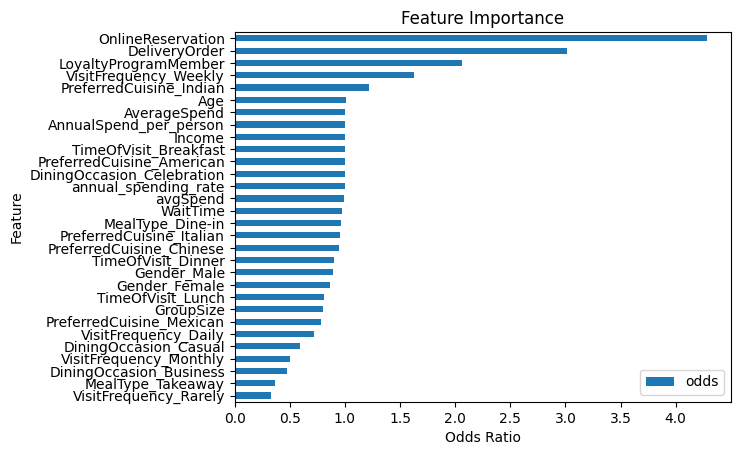

In [ ]:
# draw feature importance graph
ax = feature_importance.plot.barh(x='feature', y='odds')
# show graph from the most important feature
ax.invert_yaxis()
ax.set_xlabel('Odds Ratio')
ax.set_ylabel('Feature')
ax.set_title('Feature Importance')

Text(0.5, 1.0, 'Feature Importance (Top 10)')

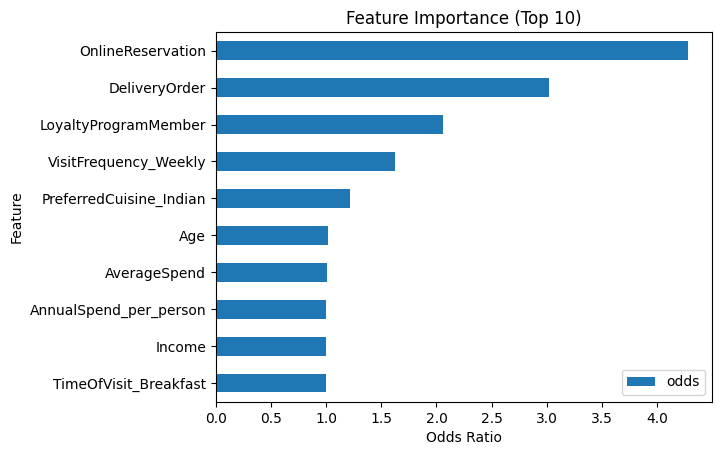

In [ ]:
# draw a graph for top 10 features
selected_top_num = 10
ax2 = feature_importance.head(selected_top_num).plot.barh(x='feature', y='odds')
ax2.invert_yaxis()
ax2.set_xlabel('Odds Ratio')
ax2.set_ylabel('Feature')
ax2.set_title('Feature Importance (Top 10)')

In [ ]:
feature_importance.head(selected_top_num)["feature"]

4           OnlineReservation
5               DeliveryOrder
6        LoyaltyProgramMember
16      VisitFrequency_Weekly
19    PreferredCuisine_Indian
0                         Age
2                AverageSpend
9      AnnualSpend_per_person
1                      Income
22      TimeOfVisit_Breakfast
Name: feature, dtype: object

## **Modeling - k-Nearest Neighbors**

In [ ]:
# import packages
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors, datasets

### **Curse of Dimensionality**

Note: Because of computational efficiency and the Curse of dimensionality, I reduced the dimensionality space by using subset of features.

In [ ]:
X_oversampled_train_knn = X_oversampled_train[['OnlineReservation', 'DeliveryOrder', 'LoyaltyProgramMember', 'VisitFrequency_Weekly', 'PreferredCuisine_Indian', 'Age', 'AverageSpend', 'AnnualSpend_per_person', 'Income', 'TimeOfVisit_Breakfast']]
X_test_knn = X_test[['OnlineReservation', 'DeliveryOrder', 'LoyaltyProgramMember', 'VisitFrequency_Weekly', 'PreferredCuisine_Indian', 'Age', 'AverageSpend', 'AnnualSpend_per_person', 'Income', 'TimeOfVisit_Breakfast']]

In [ ]:
X_oversampled_train_knn

OnlineReservation  DeliveryOrder  LoyaltyProgramMember  \
0                     0              1                     0   
1                     1              1                     1   
2                     1              1                     1   
3                     0              0                     1   
4                     0              0                     0   
...                 ...            ...                   ...   
2075                  1              0                     1   
2076                  1              1                     1   
2077                  0              1                     1   
2078                  1              1                     1   
2079                  1              1                     0   

      VisitFrequency_Weekly  PreferredCuisine_Indian  Age  AverageSpend  \
0                         0                        0   69           108   
1                         0                        0   60            25   
2                         1                        0   62           128   
3                         0                        1   49            77   
4                         0                        1   41            89   
...                     ...                      ...  ...           ...   
2075                      1                        0   33           144   
2076                      1                        0   22            87   
2077                      1                        1   32           169   
2078                      1                        1   30            79   
2079                      1                        0   36            86   

      AnnualSpend_per_person  Income  TimeOfVisit_Breakfast  
0                        435   96870                      0  
1                         16  123147                      0  
2                       1117  135684                      0  
3                         22   22520                      0  
4                         44  134722                      0  
...                      ...     ...                    ...  
2075                    1879   45795                      1  
2076                     566   46884                      0  
2077                    2205   78876                      1  
2078                     458   54812                      1  
2079                     639   48252                      0  

[2080 rows x 10 columns]

### **Standardization**

In [ ]:
# Standardize features

# nominal_variables = ['Gender_Male', 'Gender_Female', 'PreferredCuisine_Indian', 'PreferredCuisine_American', 'PreferredCuisine_Italian',
#                      'PreferredCuisine_Mexican', 'PreferredCuisine_Chinese', 'DiningOccasion_Celebration', 'DiningOccasion_Casual',
#                      'DiningOccasion_Business', 'TimeOfVisit_Breakfast', 'TimeOfVisit_Lunch', 'TimeOfVisit_Dinner', 'VisitFrequency_Daily',
#                      'VisitFrequency_Weekly', 'VisitFrequency_Monthly', 'VisitFrequency_Rarely', 'MealType_Dine-in', 'MealType_Takeaway', ]

nominal_variables = ['OnlineReservation', 'DeliveryOrder', 'LoyaltyProgramMember', 'VisitFrequency_Weekly', 'PreferredCuisine_Indian', 'TimeOfVisit_Breakfast']

# we cannot standardize nominal variables
nominal_vars_train = X_oversampled_train_knn.loc[:, nominal_variables]
nominal_vars_test = X_test_knn.loc[:, nominal_variables]

print(nominal_vars_train.head())
print(nominal_vars_test.head())

   OnlineReservation  DeliveryOrder  LoyaltyProgramMember  \
0                  0              1                     0   
1                  1              1                     1   
2                  1              1                     1   
3                  0              0                     1   
4                  0              0                     0   

   VisitFrequency_Weekly  PreferredCuisine_Indian  TimeOfVisit_Breakfast  
0                      0                        0                      0  
1                      0                        0                      0  
2                      1                        0                      0  
3                      0                        1                      0  
4                      0                        1                      0  
      OnlineReservation  DeliveryOrder  LoyaltyProgramMember  \
1116                  0              0                     0   
1368                  0              0                 

In [ ]:
X_oversampled_train_std = X_oversampled_train_knn.copy()
X_oversampled_train_std = X_oversampled_train_std.drop(nominal_vars_train.columns, axis=1)
X_train_std_col = X_oversampled_train_std.columns
X_train_std_idx = X_oversampled_train_std.index

X_test_std = X_test_knn.copy()
X_test_std = X_test_std.drop(nominal_vars_test.columns, axis=1)
X_test_std_col = X_test_std.columns
X_test_std_idx = X_test_std.index

print(X_oversampled_train_std.head())
print(X_test_std.head())

   Age  AverageSpend  AnnualSpend_per_person  Income
0   69           108                     435   96870
1   60            25                      16  123147
2   62           128                    1117  135684
3   49            77                      22   22520
4   41            89                      44  134722
      Age  AverageSpend  AnnualSpend_per_person  Income
1116   48            81                    3698   73847
1368   28            59                     620   63728
422    51            49                      14   41323
413    40           186                   11361  117841
451    58            68                    5031  120168


In [ ]:
# standarization
sc1 = StandardScaler()
sc1.fit(X_oversampled_train_std)

X_oversampled_train_std =sc1.transform(X_oversampled_train_std)
X_test_std = sc1.transform(X_test_std)


In [ ]:
# add mode and explicit variables back to X_std
X_oversampled_train_std = pd.concat([pd.DataFrame(X_oversampled_train_std, columns=X_train_std_col, index = X_train_std_idx), nominal_vars_train], axis=1)
X_test_std = pd.concat([pd.DataFrame(X_test_std, columns=X_test_std_col, index=X_test_std_idx), nominal_vars_test], axis=1)

In [ ]:
X_oversampled_train_std.head()

Age  AverageSpend  AnnualSpend_per_person    Income  \
0  1.640914      0.009932               -0.332380  0.218303   
1  1.034536     -1.659567               -0.406180  0.923733   
2  1.169287      0.412220               -0.212258  1.260301   
3  0.293407     -0.613616               -0.405123 -1.777692   
4 -0.245596     -0.372243               -0.401248  1.234475   

   OnlineReservation  DeliveryOrder  LoyaltyProgramMember  \
0                  0              1                     0   
1                  1              1                     1   
2                  1              1                     1   
3                  0              0                     1   
4                  0              0                     0   

   VisitFrequency_Weekly  PreferredCuisine_Indian  TimeOfVisit_Breakfast  
0                      0                        0                      0  
1                      0                        0                      0  
2                      1                        0                      0  
3                      0                        1                      0  
4                      0                        1                      0

In [ ]:
X_test_std.head()

Age  AverageSpend  AnnualSpend_per_person    Income  \
1116  0.226031     -0.533158                0.242341 -0.399771   
1368 -1.121476     -0.975676               -0.299796 -0.671425   
422   0.428158     -1.176821               -0.406532 -1.272908   
413  -0.312972      1.578858                1.592048  0.781289   
451   0.899785     -0.794646                0.477127  0.843759   

      OnlineReservation  DeliveryOrder  LoyaltyProgramMember  \
1116                  0              0                     0   
1368                  0              0                     0   
422                   0              1                     0   
413                   1              0                     1   
451                   1              1                     1   

      VisitFrequency_Weekly  PreferredCuisine_Indian  TimeOfVisit_Breakfast  
1116                      0                        0                      0  
1368                      1                        0                      0  
422                       0                        0                      0  
413                       0                        0                      0  
451                       0                        1                      1

### **kNN**

In [ ]:
# Cross Validation
inner_cv = KFold(n_splits=5, shuffle=True)
outer_cv = KFold(n_splits=5, shuffle=True)

In [ ]:
# GridSearchCV for KNN

gs_knn = GridSearchCV(estimator=neighbors.KNeighborsClassifier(metric='minkowski'),
                      param_grid=[{'n_neighbors': [3,5,7,9,13,17,21],
                                    'weights':['uniform','distance'],
                                    'p': [1,2]}],
                      scoring='f1',
                      cv=inner_cv,
                      n_jobs = 4)

In [ ]:
# standardized data & key as ordinal variable
knn_std = gs_knn.fit(X_oversampled_train_std, y_oversampled_train)
print("\n Standardized k-NN Parameter Tuning")
print("Non-nested CV F1: ", knn_std.best_score_)
print("Optimal Parameter: ", knn_std.best_params_)
print("Optimal Estimator: ", knn_std.best_estimator_)


 Standardized k-NN Parameter Tuning
Non-nested CV F1:  0.905897015822792
Optimal Parameter:  {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Optimal Estimator:  KNeighborsClassifier(n_neighbors=3, p=1, weights='distance')


In [ ]:
nested_score_knn_std = cross_val_score(gs_knn, X=X_oversampled_train_std, y=y_oversampled_train, cv=outer_cv)
print("Nested CV F1: ",nested_score_knn_std.mean(), " +/- ", nested_score_knn_std.std())

Nested CV F1:  0.9078650203001974  +/-  0.016541330137214847


## **Modeling - Decision Tree**

In [ ]:
# import packages
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV,KFold
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

from sklearn.tree import export_graphviz
import pydot
from IPython.display import Image

from matplotlib import pyplot

### **Decision Tree**

In [ ]:
# Cross Validation
inner_cv = KFold(n_splits = 5, shuffle = True)
outer_cv = KFold(n_splits = 5, shuffle = True)

In [ ]:
# Grid Search
gs_dt = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                  param_grid=[{'max_depth': [7,8,9,10,11,12,13,14,15,16,None],
                               'min_samples_split':[2,3,4,5,6,7,8],
                               'criterion':['gini', 'entropy'],
                               'max_features':['auto', 'sqrt', 'log2'],
                               }],
                  scoring='f1',
                  cv=inner_cv,
                  n_jobs=4)

In [ ]:
# Fit Decision Tree
gs_dt = gs_dt.fit(X_oversampled_train,y_oversampled_train)
print("\n Parameter Tuning: Decision Tree")
print("Non-nested CV F1-score: ", gs_dt.best_score_)
print("Optimal Parameter: ", gs_dt.best_params_)
print("Optimal Estimator: ", gs_dt.best_estimator_)


 Parameter Tuning: Decision Tree
Non-nested CV F1-score:  0.9430724693355579
Optimal Parameter:  {'criterion': 'gini', 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_split': 3}
Optimal Estimator:  DecisionTreeClassifier(max_depth=15, max_features='sqrt', min_samples_split=3,
                       random_state=42)


In [ ]:
nested_score_dt = cross_val_score(gs_dt, X=X_oversampled_train, y=y_oversampled_train, cv=outer_cv)
print("Nested CV F1-score: ",nested_score_dt.mean(), " +/- ", nested_score_dt.std())

Nested CV F1-score:  0.9350832453424733  +/-  0.016344294216753357


### **Visualization**

In [ ]:
# Define path of an image
# Function that takes as input fig_id and returns back the image path
PROJECT_ROOT_DIR = "."

def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, fig_id)

def save_fig(fig_id, tight_layout=True):
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(image_path(fig_id) + ".png", format='png', dpi=2400)

def export_dot(tree_classifier, file_name):
    try:
        export_graphviz(
            tree_classifier,
            out_file=image_path(file_name),
            feature_names=main.columns[0:-1],
            class_names=y.name,
            rounded=True,
            filled=True
        )
        print("Successfully exported .dot file.")
    except:
        print("Error in exporting .dot file.")

In [ ]:
# define DT with optimal parameters
tree =  gs_dt.best_estimator_

tree.fit(X_oversampled_train,y_oversampled_train)

DecisionTreeClassifier(max_depth=15, max_features='sqrt', min_samples_split=3,
                       random_state=42)

In [ ]:
# Define the class names corresponding to 0 and 1
class_names = ['NotHighSatisfaction', 'HighSatisfaction']

export_graphviz(
        tree,
        out_file=image_path("best_tree.dot"),
        feature_names=X.columns,
        class_names=class_names,
        rounded=True,
        filled=True)
(graph,) = pydot.graph_from_dot_file(image_path("best_tree.dot"))
graph.write_png(image_path('best_tree.png'))
Image(filename=image_path("best_tree.png"))

### **Important Features**

In [ ]:
# get importance as dictionary
importance = tree.feature_importances_

important_features_dict = dict()
for i,v in enumerate(importance):
    # get feature names
    colname = X_oversampled_train.columns[i]
    # store feature name and its importance
    important_features_dict[colname] = v
    # print('Feature: %s, Score: %.5f' % (colname, v))
important_features_dict

{'Age': 0.09646172083623719,
 'Income': 0.09180459790306349,
 'AverageSpend': 0.10177000368772086,
 'GroupSize': 0.08994170662250721,
 'OnlineReservation': 0.03108286494719487,
 'DeliveryOrder': 0.019930089239508276,
 'LoyaltyProgramMember': 0.04636316529635478,
 'WaitTime': 0.09191203721980229,
 'avgSpend': 0.04265191623344966,
 'AnnualSpend_per_person': 0.11031807406661741,
 'annual_spending_rate': 0.0,
 'Gender_Female': 0.020377285639044642,
 'Gender_Male': 0.01962061985837836,
 'VisitFrequency_Daily': 0.005578699460923329,
 'VisitFrequency_Monthly': 0.00782592696147155,
 'VisitFrequency_Rarely': 0.0032576426341801123,
 'VisitFrequency_Weekly': 0.04992980985133425,
 'PreferredCuisine_American': 0.015360482799672797,
 'PreferredCuisine_Chinese': 0.0051833959317385235,
 'PreferredCuisine_Indian': 0.003578872110886945,
 'PreferredCuisine_Italian': 0.016151417630581012,
 'PreferredCuisine_Mexican': 0.014080502274014327,
 'TimeOfVisit_Breakfast': 0.01139728035956608,
 'TimeOfVisit_Dinner

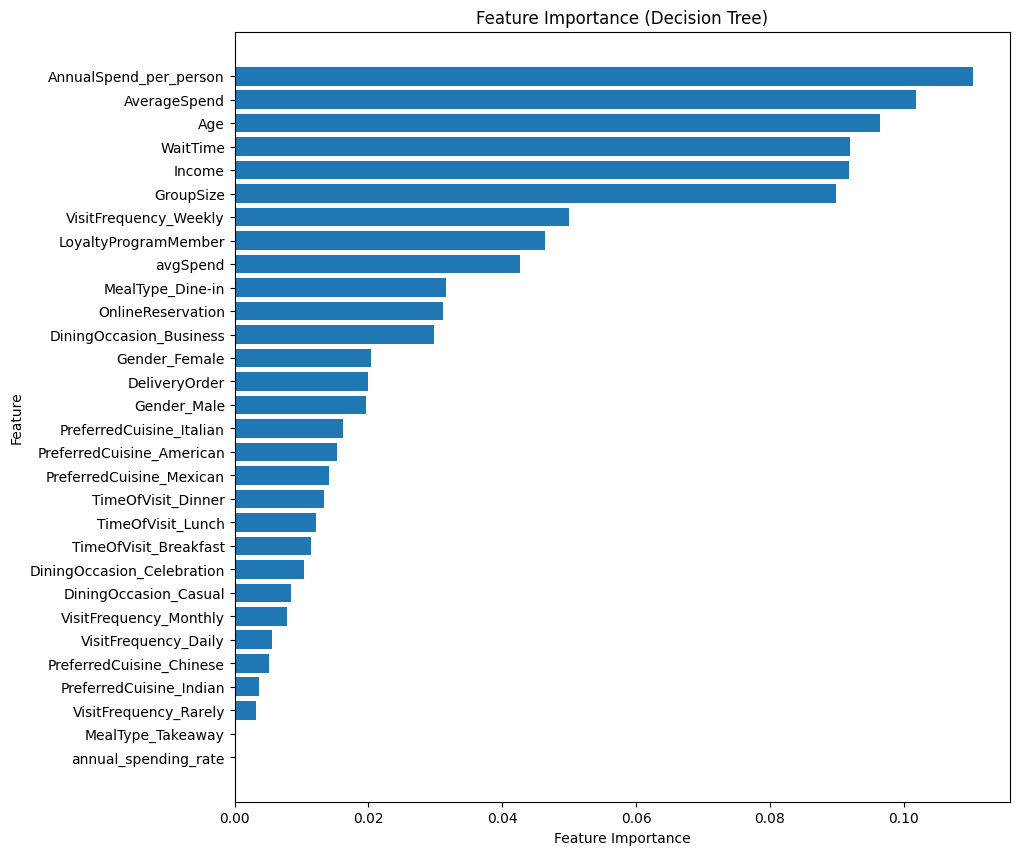

In [ ]:
# plot feature importance from important_features_dict
important_features_dict_sorted = dict(sorted(important_features_dict.items(), key=lambda item: item[1]))
pyplot.figure(figsize=(10,10))
pyplot.barh(list(important_features_dict_sorted.keys()), list(important_features_dict_sorted.values()))
pyplot.xlabel('Feature Importance')
pyplot.ylabel('Feature')
pyplot.title('Feature Importance (Decision Tree)')
pyplot.show()

In [ ]:
# get top 10 features
selected_num = 10

# sort by importance
sorted_importance_indices = np.argsort(importance)[::-1]
colname = X.columns

top_selected_important_indices = sorted_importance_indices[:selected_num]

top_selected_importance = dict()
importance_rank = 0
for importance_i in top_selected_important_indices:
    importance_rank+=1
    top_selected_importance[importance_i] = importance[importance_i]
    print("{feature}th variable is important as {importance_rank}, column name is {colname}, importance value is {importance}".format(
    feature = importance_i,
        importance_rank = importance_rank,
        colname = colname[importance_i],
        importance = importance[importance_i]
    ))

9th variable is important as 1, column name is AnnualSpend_per_person, importance value is 0.11031807406661741
2th variable is important as 2, column name is AverageSpend, importance value is 0.10177000368772086
0th variable is important as 3, column name is Age, importance value is 0.09646172083623719
7th variable is important as 4, column name is WaitTime, importance value is 0.09191203721980229
1th variable is important as 5, column name is Income, importance value is 0.09180459790306349
3th variable is important as 6, column name is GroupSize, importance value is 0.08994170662250721
16th variable is important as 7, column name is VisitFrequency_Weekly, importance value is 0.04992980985133425
6th variable is important as 8, column name is LoyaltyProgramMember, importance value is 0.04636316529635478
8th variable is important as 9, column name is avgSpend, importance value is 0.04265191623344966
28th variable is important as 10, column name is MealType_Dine-in, importance value is 0.


## **Evaluation**

In [ ]:
import pandas as pd
import numpy as np
import os
from sklearn import neighbors, linear_model,metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score, f1_score, cohen_kappa_score,  confusion_matrix, classification_report, auc,roc_curve
from sklearn.model_selection import train_test_split, KFold, cross_val_score,learning_curve, ShuffleSplit, StratifiedKFold, validation_curve, GridSearchCV
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

### **Build Classifiers with Optimal Parameters**

In [ ]:
clf_lr = gs_lr.best_estimator_
clf_knn = gs_knn.best_estimator_
clf_dt = gs_dt.best_estimator_
# clf_lr = gs_lr.best_estimator_        # LogisticRegression(fit_intercept=False, multi_class='ovr', penalty='l1',random_state=42, solver='liblinear', tol=0.01)
# clf_knn = gs_knn.best_estimator_  # KNeighborsClassifier(n_neighbors=3, p=1, weights='distance')
# clf_dt = gs_dt.best_estimator_        # DecisionTreeClassifier(max_features='auto', min_samples_split=8, random_state=42)

In [ ]:
# random permutations cross-validation
cv = ShuffleSplit(n_splits=10, test_size=0.20, random_state=42)

### **Performance Metrics & Classification Report**

In [ ]:
# https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics
from sklearn.metrics import accuracy_score, f1_score, cohen_kappa_score, classification_report

In [ ]:
# Estimate the predicted values
lr_y_pred = clf_lr.fit(X_oversampled_train,y_oversampled_train).predict(X_test)
lr_y_pred_insample = clf_lr.fit(X_oversampled_train,y_oversampled_train).predict(X_oversampled_train)

# Accuracy
print('Accuracy (out-of-sample): %.2f' % accuracy_score(y_test, lr_y_pred))
print('Accuracy (in-sample): %.2f' % accuracy_score(y_oversampled_train, lr_y_pred_insample))

# F1 score
print('F1 score (out-of-sample): ', f1_score(y_test, lr_y_pred, average='macro'))           # average='macro' calculate metrics for each label, and find their unweighted mean
print('F1 score (in-sample)    : ', f1_score(y_oversampled_train, lr_y_pred_insample, average='macro')) # this macro value does not take label imbalance into account.

# Kappa score
print('Kappa score (out-of-sample): ', cohen_kappa_score(y_test, lr_y_pred))                # computes Cohen’s kappa: a statistic that measures inter-annotator agreement
print('Kappa score (in-sample)    : ', cohen_kappa_score(y_oversampled_train, lr_y_pred_insample))      # (i.e., agreement between predictions and actual values of target variables)

# Build a text report showing the main classification metrics (out-of-sample performance)
print(classification_report(y_test, lr_y_pred))             # builds a text report showing the main classification metrics (precision, recall, f1-score)

Accuracy (out-of-sample): 0.69
Accuracy (in-sample): 0.78
F1 score (out-of-sample):  0.6110265516658211
F1 score (in-sample)    :  0.7807692307692308
Kappa score (out-of-sample):  0.28641605046796637
Kappa score (in-sample)    :  0.5615384615384615
              precision    recall  f1-score   support

           0       0.97      0.67      0.79       259
           1       0.29      0.85      0.43        41

    accuracy                           0.69       300
   macro avg       0.63      0.76      0.61       300
weighted avg       0.87      0.69      0.74       300



In [ ]:
# Estimate the predicted values
knn_y_pred = clf_knn.fit(X_oversampled_train_std,y_oversampled_train).predict(X_test_std)
knn_y_pred_insample = clf_knn.fit(X_oversampled_train_std,y_oversampled_train).predict(X_oversampled_train_std)

# Accuracy
print('Accuracy (out-of-sample): %.2f' % accuracy_score(y_test, knn_y_pred))
print('Accuracy (in-sample): %.2f' % accuracy_score(y_oversampled_train, knn_y_pred_insample))

# F1 score
print('F1 score (out-of-sample): ', f1_score(y_test, knn_y_pred, average='macro'))           # average='macro' calculate metrics for each label, and find their unweighted mean
print('F1 score (in-sample)    : ', f1_score(y_oversampled_train, knn_y_pred_insample, average='macro')) # this macro value does not take label imbalance into account.

# Kappa score
print('Kappa score (out-of-sample): ', cohen_kappa_score(y_test, knn_y_pred))                # computes Cohen’s kappa: a statistic that measures inter-annotator agreement
print('Kappa score (in-sample)    : ', cohen_kappa_score(y_oversampled_train, knn_y_pred_insample))      # (i.e., agreement between predictions and actual values of target variables)

# Build a text report showing the main classification metrics (out-of-sample performance)
print(classification_report(y_test, knn_y_pred))             # builds a text report showing the main classification metrics (precision, recall, f1-score)

Accuracy (out-of-sample): 0.73
Accuracy (in-sample): 1.00
F1 score (out-of-sample):  0.5435992578849722
F1 score (in-sample)    :  1.0
Kappa score (out-of-sample):  0.10028527540048282
Kappa score (in-sample)    :  1.0
              precision    recall  f1-score   support

           0       0.88      0.79      0.83       259
           1       0.20      0.34      0.25        41

    accuracy                           0.73       300
   macro avg       0.54      0.56      0.54       300
weighted avg       0.79      0.73      0.75       300



In [ ]:
# Estimate the predicted values
dt_y_pred = clf_dt.fit(X_oversampled_train,y_oversampled_train).predict(X_test)
dt_y_pred_insample = clf_dt.fit(X_oversampled_train,y_oversampled_train).predict(X_oversampled_train)

# Accuracy
print('Accuracy (out-of-sample): %.2f' % accuracy_score(y_test, dt_y_pred))
print('Accuracy (in-sample): %.2f' % accuracy_score(y_oversampled_train, dt_y_pred_insample))

# F1 score
print('F1 score (out-of-sample): ', f1_score(y_test, dt_y_pred, average='macro'))           # average='macro' calculate metrics for each label, and find their unweighted mean
print('F1 score (in-sample)    : ', f1_score(y_oversampled_train, dt_y_pred_insample, average='macro')) # this macro value does not take label imbalance into account.

# Kappa score
print('Kappa score (out-of-sample): ', cohen_kappa_score(y_test, dt_y_pred))                # computes Cohen’s kappa: a statistic that measures inter-annotator agreement
print('Kappa score (in-sample)    : ', cohen_kappa_score(y_oversampled_train, dt_y_pred_insample))      # (i.e., agreement between predictions and actual values of target variables)

# Build a text report showing the main classification metrics (out-of-sample performance)
print(classification_report(y_test, dt_y_pred))             # builds a text report showing the main classification metrics (precision, recall, f1-score)

Accuracy (out-of-sample): 0.77
Accuracy (in-sample): 1.00
F1 score (out-of-sample):  0.5339133522727273
F1 score (in-sample)    :  0.9985576893073234
Kappa score (out-of-sample):  0.0685709216712499
Kappa score (in-sample)    :  0.9971153846153846
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       259
           1       0.19      0.22      0.20        41

    accuracy                           0.77       300
   macro avg       0.53      0.54      0.53       300
weighted avg       0.78      0.77      0.77       300



### **Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix           # confusion_matrix will help us compute confusion matrix
import itertools
import matplotlib.pyplot as plt

In [ ]:
# Function that prints and plots the confusion matrix.
# Normalization can be applied by setting `normalize=True` (see below for examples)
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # devide absolute number of observations with sum across columns to get the relative percentage of observations
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)         # shows the confusion matrix in the console
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))                       # add tick marks to the confusion matrix
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'                          # choose format depending on whether the confusion matrix is normalizaed or not
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])): # loop that adds the value to each cell of the confusion matrix
        plt.text(j, i, format(cm[i, j], fmt),                              # we reformat how the cell values are displayed accroding to the variable fmt we defined before
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[173  86]
 [  6  35]]


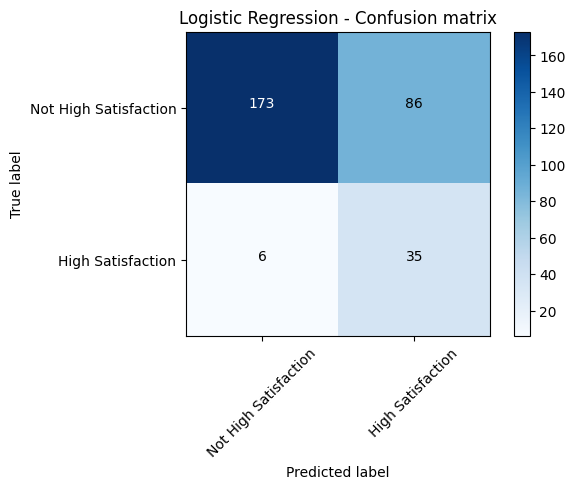

In [ ]:
lr_y_pred = clf_lr.fit(X_oversampled_train,y_oversampled_train).predict(X_test)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(confusion_matrix(y_test, lr_y_pred), classes= ['Not High Satisfaction', 'High Satisfaction'], title='Logistic Regression - Confusion matrix')
plt.show()

Confusion matrix, without normalization
[[204  55]
 [ 27  14]]


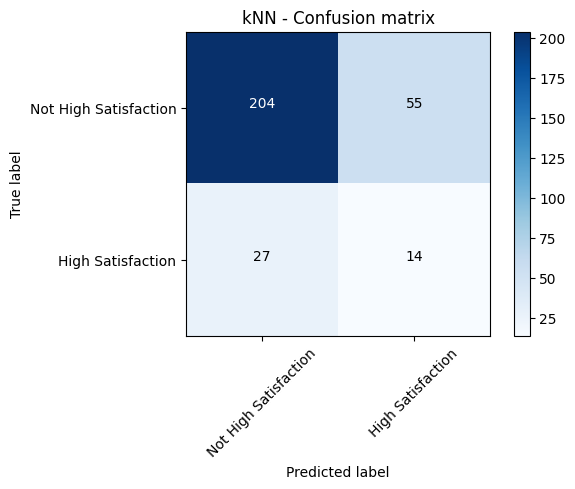

In [ ]:
knn_y_pred = clf_knn.fit(X_oversampled_train_std,y_oversampled_train) .predict(X_test_std)
# print(knn_y_pred)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(confusion_matrix(y_test, knn_y_pred), classes= ['Not High Satisfaction', 'High Satisfaction'], title='kNN - Confusion matrix')
plt.show()

Confusion matrix, without normalization
[[221  38]
 [ 32   9]]


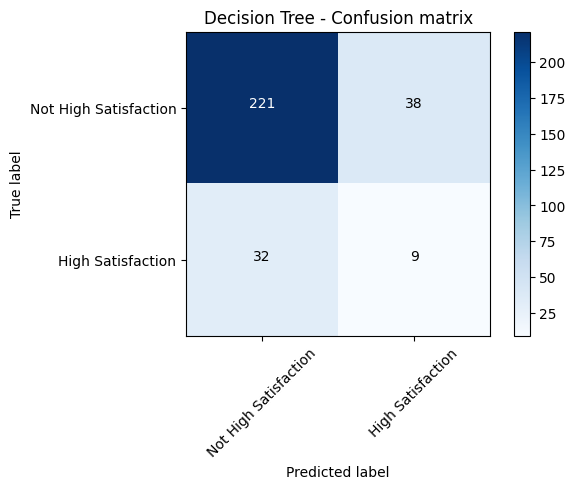

In [ ]:
dt_y_pred = clf_dt.fit(X_oversampled_train,y_oversampled_train).predict(X_test)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(confusion_matrix(y_test, dt_y_pred), classes= ['Not High Satisfaction', 'High Satisfaction'], title='Decision Tree - Confusion matrix')
plt.show()

### **Learning Curves**

In [ ]:
### Function for Learning Curves
def plot_learning_curve(estimator, title, X, y, scoring_method, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 10)):
    plt.figure()                    #display figure
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples") #y label title
    plt.ylabel(scoring_method)             #x label title

    # Class learning_curve determines cross-validated training and test scores for different training set sizes
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, scoring = scoring_method, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes,random_state =42)

    # Cross validation statistics for training and testing data (mean and standard deviation)
    train_scores_mean = np.mean(train_scores, axis=1) # Compute the arithmetic mean along the specified axis.
    train_scores_std = np.std(train_scores, axis=1)   # Compute the standard deviation along the specified axis.
    test_scores_mean = np.mean(test_scores, axis=1)   # Compute the arithmetic mean along the specified axis.
    test_scores_std = np.std(test_scores, axis=1)     # Compute the standard deviation along the specified axis.

    plt.grid() # Configure the grid lines

    # Fill the area around the line to indicate the size of standard deviations for the training data
    # and the test data
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r") # train data performance indicated with red
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g") # test data performance indicated with green

    # Cross-validation means indicated by dots
    # Train data performance indicated with red
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    # Test data performance indicated with green
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best") # Show legend of the plot at the best location possible
    return plt             # Function that returns the plot as an output

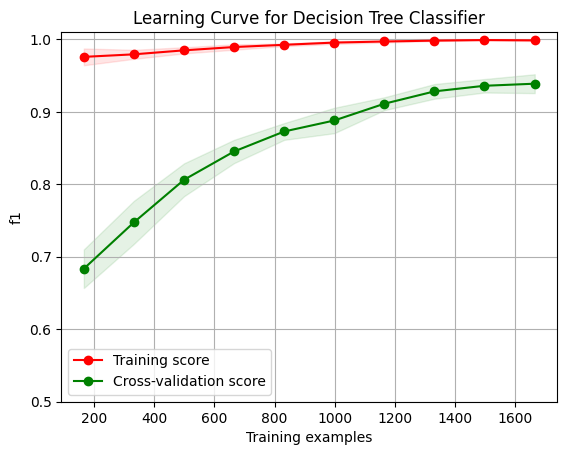

In [ ]:
# Learning Curve: Decision Tree Classifier
plot_learning_curve(clf_dt, "Learning Curve for Decision Tree Classifier", X_oversampled_train, y_oversampled_train, 'f1',(0.50, 1.01), cv=cv, n_jobs=4)
plt.show()

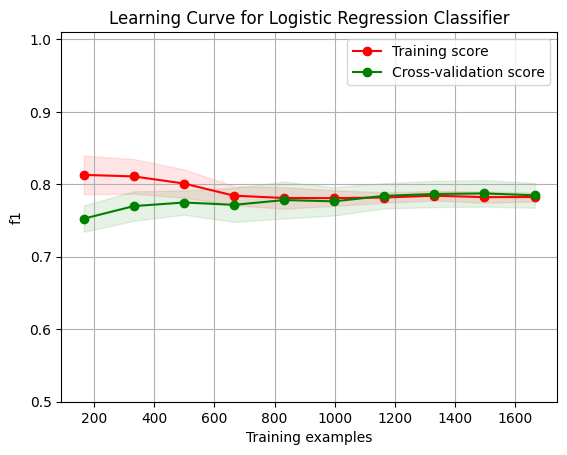

In [ ]:
# Learning Curve: Logistic Regression Classifier
plot_learning_curve(clf_lr, "Learning Curve for Logistic Regression Classifier", X_oversampled_train, y_oversampled_train, 'f1',(0.50, 1.01), cv=cv, n_jobs=4)
plt.show()

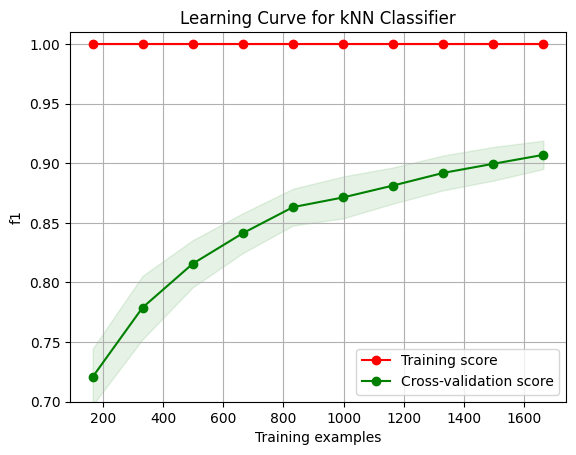

In [ ]:
# Learning Curve: kNN Classifier
plot_learning_curve(clf_knn, "Learning Curve for kNN Classifier", X_oversampled_train_std, y_oversampled_train, 'f1',(0.70, 1.01), cv=cv, n_jobs=4)
plt.show()

### **Fitting Graphs**

In [ ]:
# Function for fitting graphs
def plot_fitting_curve(estimator, title, X, y,param_name,param_range,scoring_method, ylim=None, cv=None,
                        n_jobs=1):

    plt.figure()
    plt.grid()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Parameter "+param_name)
    plt.ylabel(scoring_method)

    train_scores, test_scores = validation_curve(estimator=estimator, X=X,y=y,param_name=param_name, param_range=param_range,cv=cv,scoring=scoring_method,n_jobs=4)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.plot(param_range, train_mean, color='blue', marker='o',markersize=5, label='training f1-score')
    plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

    plt.plot(param_range, test_mean,color='green', linestyle='--', marker='s', markersize=5, label='validation f1-score')
    plt.fill_between(param_range,test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

    plt.legend(loc='best')
    plt.tight_layout()
    return plt

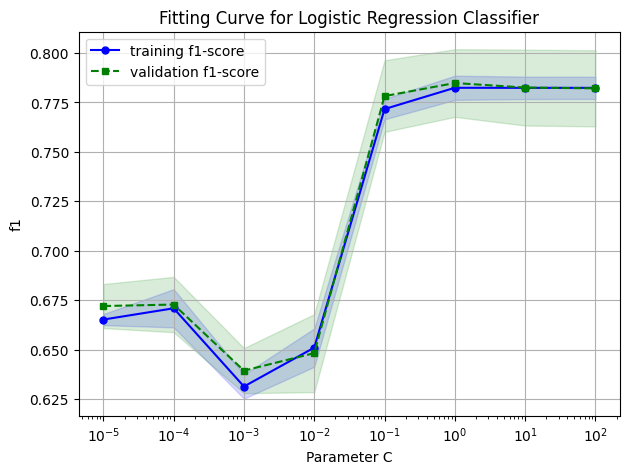

In [ ]:
# Fitting Graph: Logistic Regression Classifier
param_range = [0.00001, 0.0001, 0.001, 0.01, 0.1 ,1 ,10 ,100]
plot_fitting_curve(clf_lr, "Fitting Curve for Logistic Regression Classifier", X_oversampled_train, y_oversampled_train,
                   'C', param_range,'f1', cv=cv, n_jobs=4)
plt.xscale('log')
plt.show()

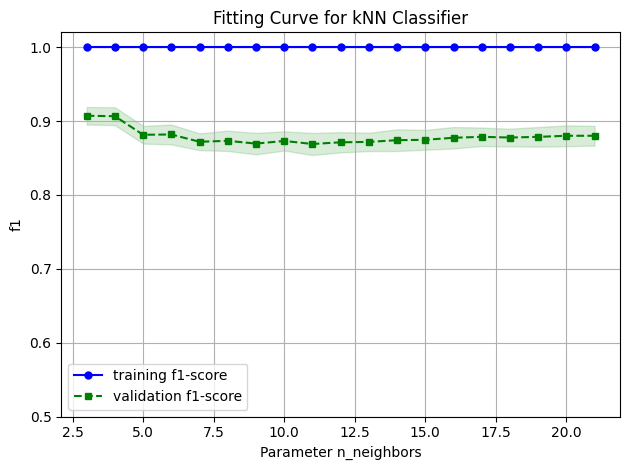

In [ ]:
# Fitting Graph: kNN Classifier

param_range = [i for i in range(3,22)]
plot_fitting_curve(clf_knn, "Fitting Curve for kNN Classifier", X_oversampled_train_std, y_oversampled_train,
                   'n_neighbors', param_range,'f1', ylim=[0.5,1.02], cv=cv, n_jobs=4)
plt.show()

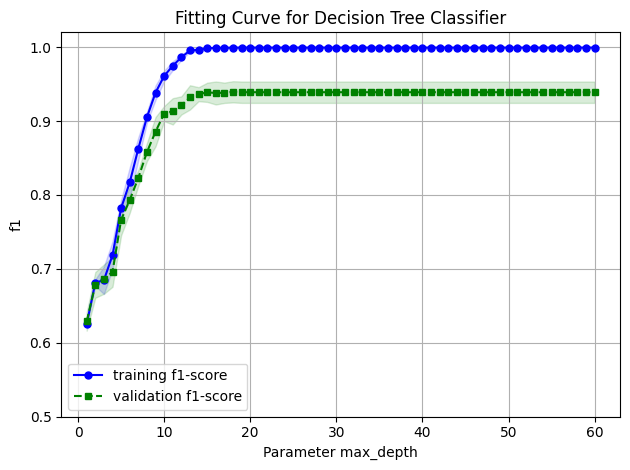

In [ ]:
# Fitting Graph: Decision Tree Classifier
param_range = [i for i in range(1,61)]
plot_fitting_curve(clf_dt, "Fitting Curve for Decision Tree Classifier", X_oversampled_train, y_oversampled_train,
                   'max_depth',param_range,'f1', ylim=[0.5,1.02], cv=cv, n_jobs=4)
plt.show()

### **ROC Curves**

In [ ]:
# Function for ROC curves
def plot_ROC_curve(clf, label, clr, ls, X_train, X_test, y_train, y_test):
    y_pred = clf.fit(X_train, y_train).predict_proba(X_test)[:, 1] # Make predictions based on the classifiers
    fpr, tpr, thresholds = roc_curve(y_true=y_test, # Build ROC curve
                                     y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)                # Compute Area Under the Curve (AUC)
    plt.plot(fpr, tpr,                         # Plot ROC Curve and create label with AUC values
             color=clr,
             linestyle=ls,
             label='%s (auc = %0.2f)' % (label, roc_auc))
    return plt

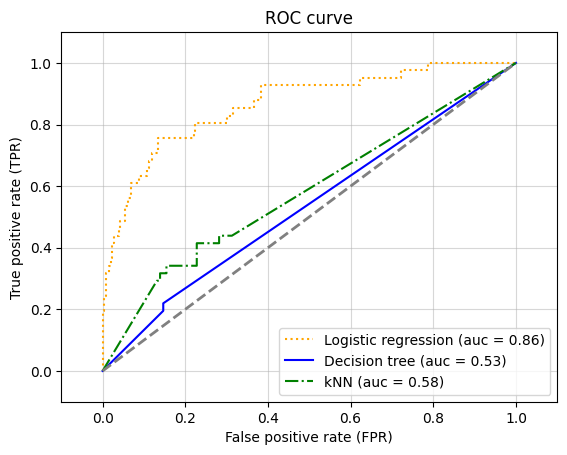

In [ ]:
# Draw ROC Curves

#LR
plot_ROC_curve(clf_lr, label='Logistic regression', clr='orange', ls=':', X_train=X_oversampled_train, X_test=X_test, y_train=y_oversampled_train, y_test=y_test)
#DT
plot_ROC_curve(clf_dt, label='Decision tree', clr='blue', ls='-', X_train=X_oversampled_train, X_test=X_test, y_train=y_oversampled_train, y_test=y_test)
#kNN
plot_ROC_curve(clf_knn, label='kNN', clr='green', ls='-.', X_train=X_oversampled_train_std, X_test=X_test_std, y_train=y_oversampled_train, y_test=y_test)

plt.legend(loc='lower right')    # Where to place the legend
plt.plot([0, 1], [0, 1], # Visualize random classifier
         linestyle='--',
         color='gray',
         linewidth=2)

plt.xlim([-0.1, 1.1])   #limits for x axis
plt.ylim([-0.1, 1.1])   #limits for y axis
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')
plt.title('ROC curve')
#plt.savefig('ROC_all_classifiers', dpi=300)
plt.show()